In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df_origin = pd.read_csv('train.csv')
df = df_origin.copy()
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
df.shape

(74111, 29)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.000000,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
log_price,74111.0,4.782069e+00,7.173938e-01,0.000000,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00
accommodates,74111.0,3.155146e+00,2.153589e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73911.0,1.235263e+00,5.820441e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,74111.0,3.844596e+01,3.080167e+00,33.338905,3.412791e+01,4.066214e+01,4.074610e+01,4.239044e+01
longitude,74111.0,-9.239753e+01,2.170532e+01,-122.511500,-1.183424e+02,-7.699696e+01,-7.395466e+01,-7.098505e+01
number_of_reviews,74111.0,2.090057e+01,3.782864e+01,0.000000,1.000000e+00,6.000000e+00,2.300000e+01,6.050000e+02
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74020.0,1.265793e+00,8.521435e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01


In [6]:
df.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74111
longitude                 74111
name                      73359
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     769
bedrooms                     11
beds                         18
dtype: int64

In [7]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [8]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [9]:
missing_percentage = df.isnull().mean() * 100
# Filter columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage > 0]
# Print the columns with missing values and their percentages
for column, percentage in columns_with_missing_values.items():
    print(f"{column}' : {percentage:.2f}%")

bathrooms' : 0.27%
first_review' : 21.41%
host_has_profile_pic' : 0.25%
host_identity_verified' : 0.25%
host_response_rate' : 24.69%
host_since' : 0.25%
last_review' : 21.36%
neighbourhood' : 9.27%
review_scores_rating' : 22.56%
thumbnail_url' : 11.09%
zipcode' : 1.30%
bedrooms' : 0.12%
beds' : 0.18%


In [10]:
pd.set_option('display.max_colwidth', 0)
df[['property_type','room_type','bed_type','cancellation_policy',
      'cleaning_fee','city','host_has_profile_pic','host_identity_verified',
     'host_response_rate','instant_bookable','neighbourhood']].agg(['unique']).transpose()

,unique
property_type,"[Apartment, House, Condominium, Loft, Townhouse, Hostel, Guest suite, Bed & Breakfast, Bungalow, Guesthouse, Dorm, Other, Camper/RV, Villa, Boutique hotel, Timeshare, In-law, Boat, Serviced apartment, Castle, Cabin, Treehouse, Tipi, Vacation home, Tent, Hut, Casa particular, Chalet, Yurt, Earth House, Parking Space, Train, Cave, Lighthouse, Island]"
room_type,"[Entire home/apt, Private room, Shared room]"
bed_type,"[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]"
cancellation_policy,"[strict, moderate, flexible, super_strict_30, super_strict_60]"
cleaning_fee,"[True, False]"
city,"[NYC, SF, DC, LA, Chicago, Boston]"
host_has_profile_pic,"[t, nan, f]"
host_identity_verified,"[t, f, nan]"
host_response_rate,"[nan, 100%, 71%, 68%, 67%, 83%, 50%, 90%, 86%, 92%, 82%, 80%, 89%, 93%, 99%, 0%, 88%, 96%, 70%, 94%, 91%, 25%, 95%, 98%, 62%, 29%, 33%, 81%, 63%, 38%, 60%, 79%, 78%, 75%, 65%, 97%, 87%, 40%, 54%, 53%, 58%, 76%, 30%, 64%, 17%, 20%, 77%, 73%, 41%, 59%, 57%, 85%, 56%, 42%, 44%, 35%, 14%, 74%, 27%, 10%, 84%, 6%, 72%, 36%, 55%, 43%, 13%, 39%, 46%, 26%, 61%, 52%, 23%, 22%, 69%, 66%, 15%, 11%, 31%, 21%, 47%]"
instant_bookable,"[f, t]"


In [11]:
duplicates = df.duplicated(keep=False)
print(df[duplicates])

Empty DataFrame
Columns: [id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds]
Index: []

[0 rows x 29 columns]


In [12]:
#dropping duplicated colunms
df=df.drop_duplicates()

In [13]:
#We created a pair of scatterplots that are used to visualize 
  #the relationship of variables in the DataFrame to each other.
# import seaborn as sns
# sns.pairplot(df, kind  ="reg");

In [14]:
df['id']

0        6901257 
1        6304928 
2        7919400 
3        13418779
4        3808709 
          ...    
74106    14549287
74107    13281809
74108    18688039
74109    17045948
74110    3534845 
Name: id, Length: 74111, dtype: int64

In [15]:
# Id is dropped since it has no affect.
df.drop("id" , axis=1 , inplace=True)

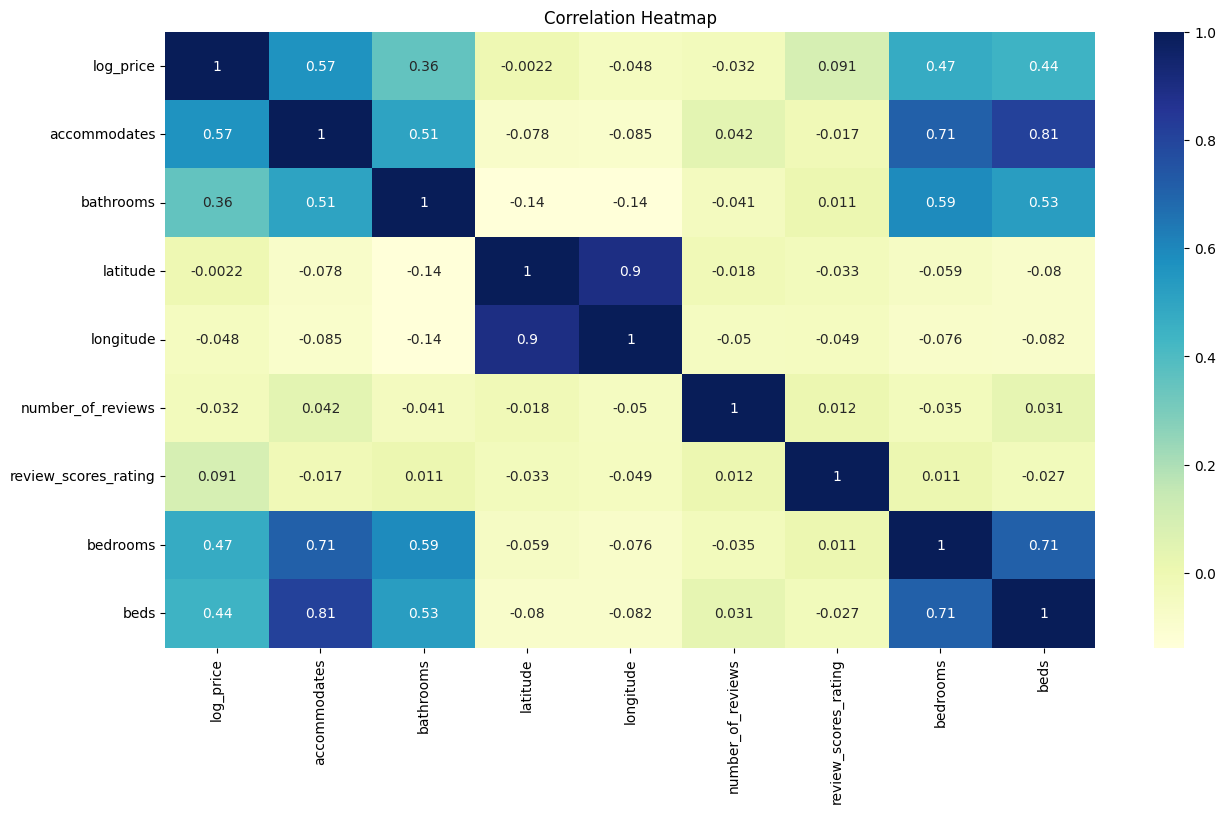

In [16]:
#we check correlation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=np.number).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 8))
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()


<AxesSubplot: >

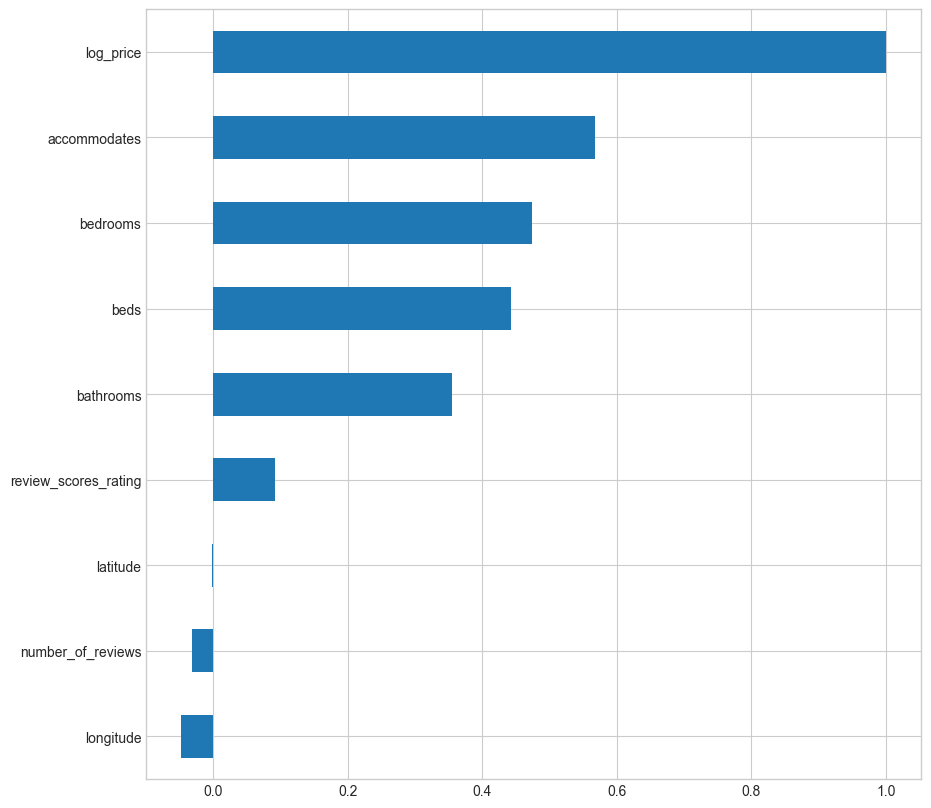

In [17]:

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10,10))
df[numeric_columns].corr()["log_price"].sort_values().plot(kind="barh")

In [18]:
#we check the correlation between our target variable and other columns
target_correlation = df[numeric_columns].corr()['log_price'].abs().sort_values(ascending=False)
target_correlation

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
review_scores_rating    0.091219
longitude               0.047529
number_of_reviews       0.032470
latitude                0.002193
Name: log_price, dtype: float64

##### Most related numeric columns with target are:accommodates ,bedrooms ,bathrooms

# Handling Missing Values

In [19]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 200  
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              15864
host_has_profile_pic      188  
host_identity_verified    188  
host_response_rate        18299
host_since                188  
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             6872 
number_of_reviews         0    
review_scores_rating      16722
thumbnail_url             8216 
zipcode                   966  
bedrooms                  91   
beds                      131  
dtype: int64

#### id, log_price ,property_type ,room_type,amenities,accommodates, bed_type, cancellation_policy ,cleaning_fee  

In [20]:
#They have no missing value

#### property_type -Feature enginerering kismina gidecek

In [21]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Others' #???????????????????calistirmadim

### bathrooms

In [22]:
df["bathrooms"].isnull().sum()

200

In [23]:
# There only 200 missing values. It makes no difference
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

In [24]:
df["bathrooms"].isnull().sum()

0

#### city

In [25]:
df['city']

0        NYC
1        NYC
2        NYC
3        SF 
4        DC 
         .. 
74106    NYC
74107    LA 
74108    NYC
74109    NYC
74110    LA 
Name: city, Length: 74111, dtype: object

In [26]:
df['city'].isnull().sum()

0

### description

In [27]:
df['description']

0        Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [28]:
df['description'].isnull().sum()

0

### first_review-last_review

In [29]:
df['first_review'].isnull().sum()

15864

In [30]:
df['first_review']

0        2016-06-18
1        2017-08-05
2        2017-04-30
3        NaN       
4        2015-05-12
            ...    
74106    NaN       
74107    2016-08-15
74108    2015-01-03
74109    NaN       
74110    2013-09-05
Name: first_review, Length: 74111, dtype: object

In [31]:
df['last_review'].isnull().sum()

15827

In [32]:
df['last_review']

0        2016-07-18
1        2017-09-23
2        2017-09-14
3        NaN       
4        2017-01-22
            ...    
74106    NaN       
74107    2017-04-15
74108    2017-09-10
74109    NaN       
74110    2017-04-30
Name: last_review, Length: 74111, dtype: object

In [33]:
 # Converting to datetime
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)

In [34]:
#We calculated the percentage of blank values in the first_review and review_scores_rating columns
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'last_review': {round(100*df.last_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 21.4%
Null values in 'last_review': 21.4%
Null values in 'review_scores_rating': 22.6%


In [35]:
#We checked for the same null values in the first_review,last_review and review_scores_rating columns
first_review_column = df['first_review']
last_review_column = df['last_review']
review_scores_rating_column = df['review_scores_rating']

nan_in_first_review = first_review_column.isna()
nan_in_last_review = last_review_column.isna()
nan_in_review_scores_rating = review_scores_rating_column.isna()

nan_match = nan_in_first_review.all() == nan_in_first_review.all() == nan_in_review_scores_rating.all()

nan_match

True

About one-fifth of listings do not have a review written for them. This is an unnecessarily large proportion of the dataset, and dropping columns loses a lot of useful information - reviews are crucial in people's decision to book, and therefore price.

This is also a dataset ratio that is too large to simply replace with median/mean values, as it will drastically skew the distribution. Also, the missing values here aren't really the missing values, because it makes sense that they're NaNs - it tells us that these are new or unbooked and not yet reviewed lists. To make the resulting model work in such a way that it can predict the prices of any Airbnb listing, including brand new listings, it's actually useful to keep them in. Therefore, we will replace them with 00-00-00

### host_has_profile_pic - host_identity_verified - host_since

In [36]:
df['host_has_profile_pic'].isnull().sum()


188

In [37]:
df['host_identity_verified'].isnull().sum()

188

In [38]:
df['host_since'].isnull().sum()

188

In [39]:
#We check the nan values

print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 188
Null values in 'host_identity_verified': 188
Null values in 'host_since': 188


In [40]:
#We checked for the same null values in the host_has_profile_pic and host_identity_verified columns

nan_in_profile = df['host_has_profile_pic'].isna()
nan_in_id = df['host_identity_verified'].isna()
nan_in_host_since = df['host_since'].isna()

nan_match1 = nan_in_profile.all() == nan_in_id.all() == nan_in_host_since.all()

nan_match1

True

In [41]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

In [42]:
#We filled the nan values
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(0)
df['host_identity_verified'] = df['host_identity_verified'].fillna(0)
df['host_since'].fillna(df['host_since'].median(), inplace=True)

In [43]:
print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 0
Null values in 'host_identity_verified': 0
Null values in 'host_since': 0


### host_response_rate

In [44]:
df['host_response_rate']

0        NaN 
1        100%
2        100%
3        NaN 
4        100%
         ... 
74106    NaN 
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [45]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
df['host_response_rate']

0       NaN   
1        100.0
2        100.0
3       NaN   
4        100.0
         ...  
74106   NaN   
74107    100.0
74108    100.0
74109    100.0
74110    100.0
Name: host_response_rate, Length: 74111, dtype: float64

In [46]:
#We calculated the percentage of blank values in the host_response_rate 
print(f"Null values in 'host_response_rate': {round(100*df.host_response_rate.isna().sum()/len(df),1)}%")

Null values in 'host_response_rate': 24.7%


In [47]:
print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 77.5%


### instant_bookable

In [48]:
df['instant_bookable']

0        f
1        t
2        t
3        f
4        t
        ..
74106    f
74107    f
74108    t
74109    t
74110    f
Name: instant_bookable, Length: 74111, dtype: object

In [49]:
df['instant_bookable'].isnull().sum()

0

### 24-Number_of_reviews

In [50]:
df_origin['number_of_reviews'].isnull().sum()

0

### 25-review_scores_rating

In [51]:
df['review_scores_rating'].isnull().sum()

16722

In [52]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())

df['review_scores_rating'].isnull().sum()

0

### 26-Thumbnail_url

In [53]:
# this column has nothing interesting and inclde the photos of room. We are going to 
# take this column account if there is photo of not. So ether 0 or 1.
df['thumbnail_url'] = df['thumbnail_url'].fillna(0).apply(lambda x: 1 if x else 0)
df['thumbnail_url'].isnull().sum()

0

In [54]:
df['thumbnail_url'].value_counts()

1    65895
0    8216 
Name: thumbnail_url, dtype: int64

### 27-zipcode

In [55]:
df['zipcode'] = df['zipcode'].astype(str).str.rstrip('.0')

In [56]:
import re

pattern = r'[^0-9]'  # Regular expression pattern to match unwanted characters
df['zipcode'][df['zipcode'].str.contains(pattern, na=False)]
# There are unwanted characters in the zipcode column. Since we can fill the missing values with coordinates. ITs better to set them None to save time

26       nan
96       nan
189      nan
340         
401      nan
        ... 
73642    nan
73763    nan
73925    nan
74060    nan
74083    nan
Name: zipcode, Length: 987, dtype: object

In [57]:
df['zipcode'][df['zipcode'].str.contains(pattern, na=False)] = None

In [58]:
# TO fill 981 zipcode missing value
# There are coordinates of the given airbnb property. With these coordinates we find the zipcodes.
# This process takes sometime
from uszipcode import SearchEngine
from geopy.geocoders import Nominatim

def get_zipcode(latitude, longitude):
 
    geolocator = Nominatim(user_agent='my_app')
    location = geolocator.reverse(f"{latitude}, {longitude}")
    address = location.raw['address']
    zipcode = address.get('postcode')
    return zipcode

for index, row in df.iterrows():
    if pd.isnull(row['zipcode']):
        zipcode = get_zipcode(row['latitude'], row['longitude'])
        df.loc[index, 'zipcode'] = zipcode

In [59]:
df['zipcode'].isnull().sum()

0

### 23-Neighbourhood

In [60]:
df['neighbourhood'].isnull().sum()
# Going to be filled with the help of coordinates

6872

In [61]:

def get_neighborhood(zipcode):
    search = SearchEngine()
    zipcode_data = search.by_zipcode(zipcode)
    if zipcode_data:
        neighborhood = zipcode_data.major_city
        if neighborhood:
            return neighborhood
        else:
            return "Neighborhood information not found."
    else:
        return "Zip code information not found."

# Iterate over your DataFrame and get neighborhood information for each zip code
for index, row in df.iterrows():
    if pd.isnull(df.loc[index, 'neighbourhood']) :
        zipcode = row['zipcode']
        neighborhood = get_neighborhood(zipcode)
        df.loc[index, 'neighbourhood'] = neighborhood

In [62]:
df['neighbourhood'].isnull().sum()

0

### 28-29-bed and bedrooms

In [63]:
# Since the missing value ratio to all data is relatively too small  we fill these parts wth the KNNImputer

from sklearn.impute import KNNImputer
# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)
# Fit the imputer on the data and transform it
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['beds']= np.ceil(imputer.fit_transform(df[['beds']]))
df['bedrooms']= np.ceil(imputer.fit_transform(df[['bedrooms']]))

In [64]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 0    
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              15864
host_has_profile_pic      0    
host_identity_verified    0    
host_response_rate        18299
host_since                0    
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             0    
number_of_reviews         0    
review_scores_rating      0    
thumbnail_url             0    
zipcode                   0    
bedrooms                  0    
beds                      0    
dtype: int64

In [65]:
def get_value_counts(df):
    """
    Returns the value counts of all categorical columns in the given df.
    
    Args:
        df (pandas.df): The df.
    
    Returns:
        dict: Dictionary containing value counts of each categorical column.
    """
    columns_values=['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'accommodates',
 'bathrooms',
 'host_has_profile_pic',
 'host_identity_verified',
 'instant_bookable',
 'bedrooms',
 'beds',
 'first_review',
 'neighbourhood'

 ]
    value_counts = {}
    for column in columns_values:
        value_counts[column] = df[column].value_counts()
        
    return value_counts

## Example usage
value_counts = get_value_counts(df)
for column, counts in value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print(50*'--')

Column: property_type
Apartment    50268
House        18754
Others       5089 
Name: property_type, dtype: int64
----------------------------------------------------------------------------------------------------
Column: room_type
Entire home/apt    41310
Private room       30638
Shared room        2163 
Name: room_type, dtype: int64
----------------------------------------------------------------------------------------------------
Column: bed_type
Real Bed         72028
Futon            753  
Pull-out Sofa    585  
Airbed           477  
Couch            268  
Name: bed_type, dtype: int64
----------------------------------------------------------------------------------------------------
Column: cancellation_policy
strict             32374
flexible           22545
moderate           19063
super_strict_30    112  
super_strict_60    17   
Name: cancellation_policy, dtype: int64
----------------------------------------------------------------------------------------------------
Column

In [66]:
# 10 Most expensve air bnb
top_reviewed_hosts= df.nlargest(10,'log_price').head(10)
top_reviewed_hosts

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
19210,7.600402,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Smoking allowed"",""Pets allowed"",Gym,Breakfast,""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",10,4.5,Real Bed,strict,True,LA,...,34.101991,-118.418381,"Beverly Hills Estate Pool, Tennis & Jetliner Views",Bel Air/Beverly Crest,0,94.067365,0,9021,4.0,4.0
42672,7.600402,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Buzzer/wireless intercom"",Heating,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher""}",2,1.0,Real Bed,moderate,True,NYC,...,40.728233,-73.989335,Huge Loft with Private Entrance,East Village,20,85.000000,1,10003,1.0,1.0
55453,7.600402,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Pets allowed"",""Indoor fireplace"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,""Lock on bedroom door"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Private entrance""}",7,3.5,Real Bed,strict,True,NYC,...,40.733003,-73.994126,Royal Manor!!!,Greenwich Village,1,80.000000,1,10003,4.0,4.0
60071,7.600402,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Shampoo,""24-hour check-in"",""Hair dryer"",Iron}",6,1.0,Real Bed,strict,False,DC,...,38.947020,-77.066699,Cozy apartment in Van Ness on metro,Washington,0,94.067365,0,20008,1.0,2.0
72609,7.600402,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Pets allowed"",Breakfast,Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,""Lock on bedroom door"",""Hair dryer"",Iron,""Laptop friendly workspace"",""Private entrance""}",6,2.5,Real Bed,flexible,False,DC,...,38.904998,-76.986020,Spacious Three-bedroom Trinidad Rowhouse,Trinidad,0,94.067365,0,20002,3.0,3.0
3063,7.598399,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",16,7.5,Real Bed,strict,True,LA,...,34.123808,-118.628714,Tara Sanctuary,Topanga,0,94.067365,1,9029,8.0,11.0
9390,7.598399,House,Private room,"{""Wireless Internet"",""Free parking on premises"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Hangers}",2,1.0,Real Bed,strict,False,SF,...,37.787035,-122.493215,Golden Gate Penthouse Suite at Casa al Mare,Sea Cliff,0,94.067365,1,94121,1.0,1.0
20722,7.598399,House,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Smoking allowed"",""Pets allowed"",""Hot tub"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Safety card"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",16,5.5,Real Bed,strict,

# Visualition
### Value Counts

In [67]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)


def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

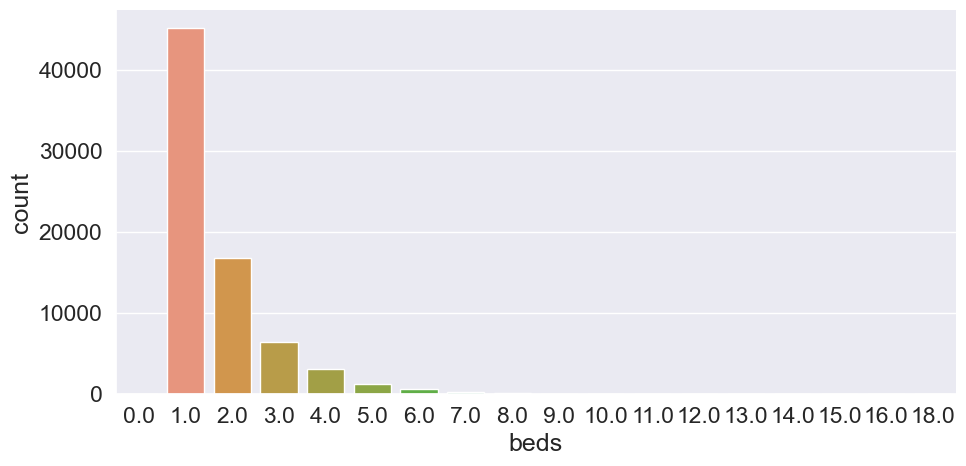

In [68]:
plot_catplot("beds", "count", 5, 2)

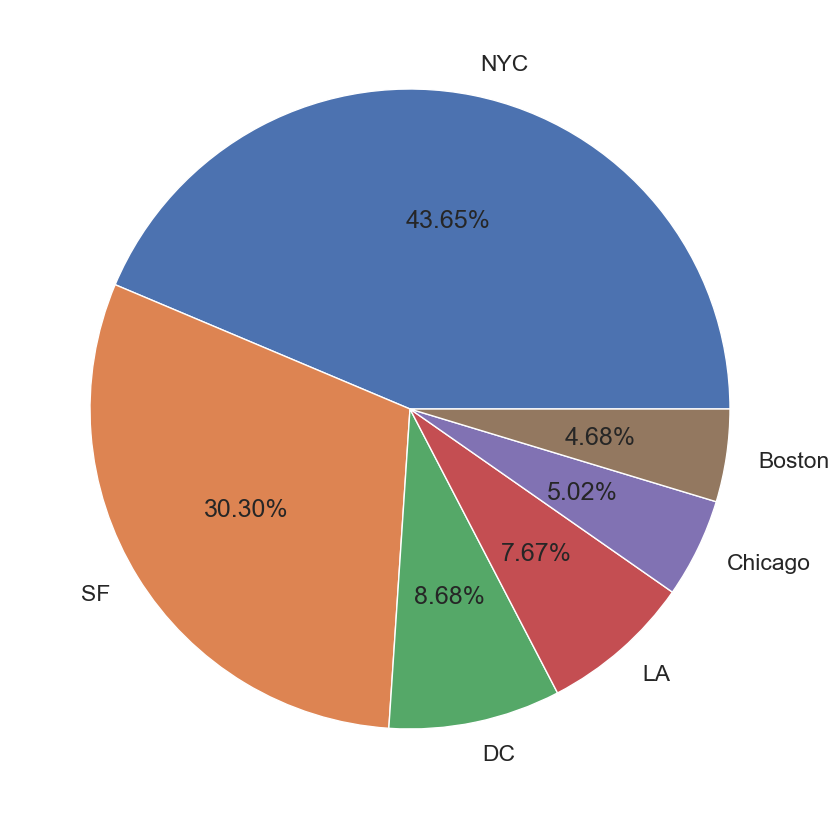

In [69]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

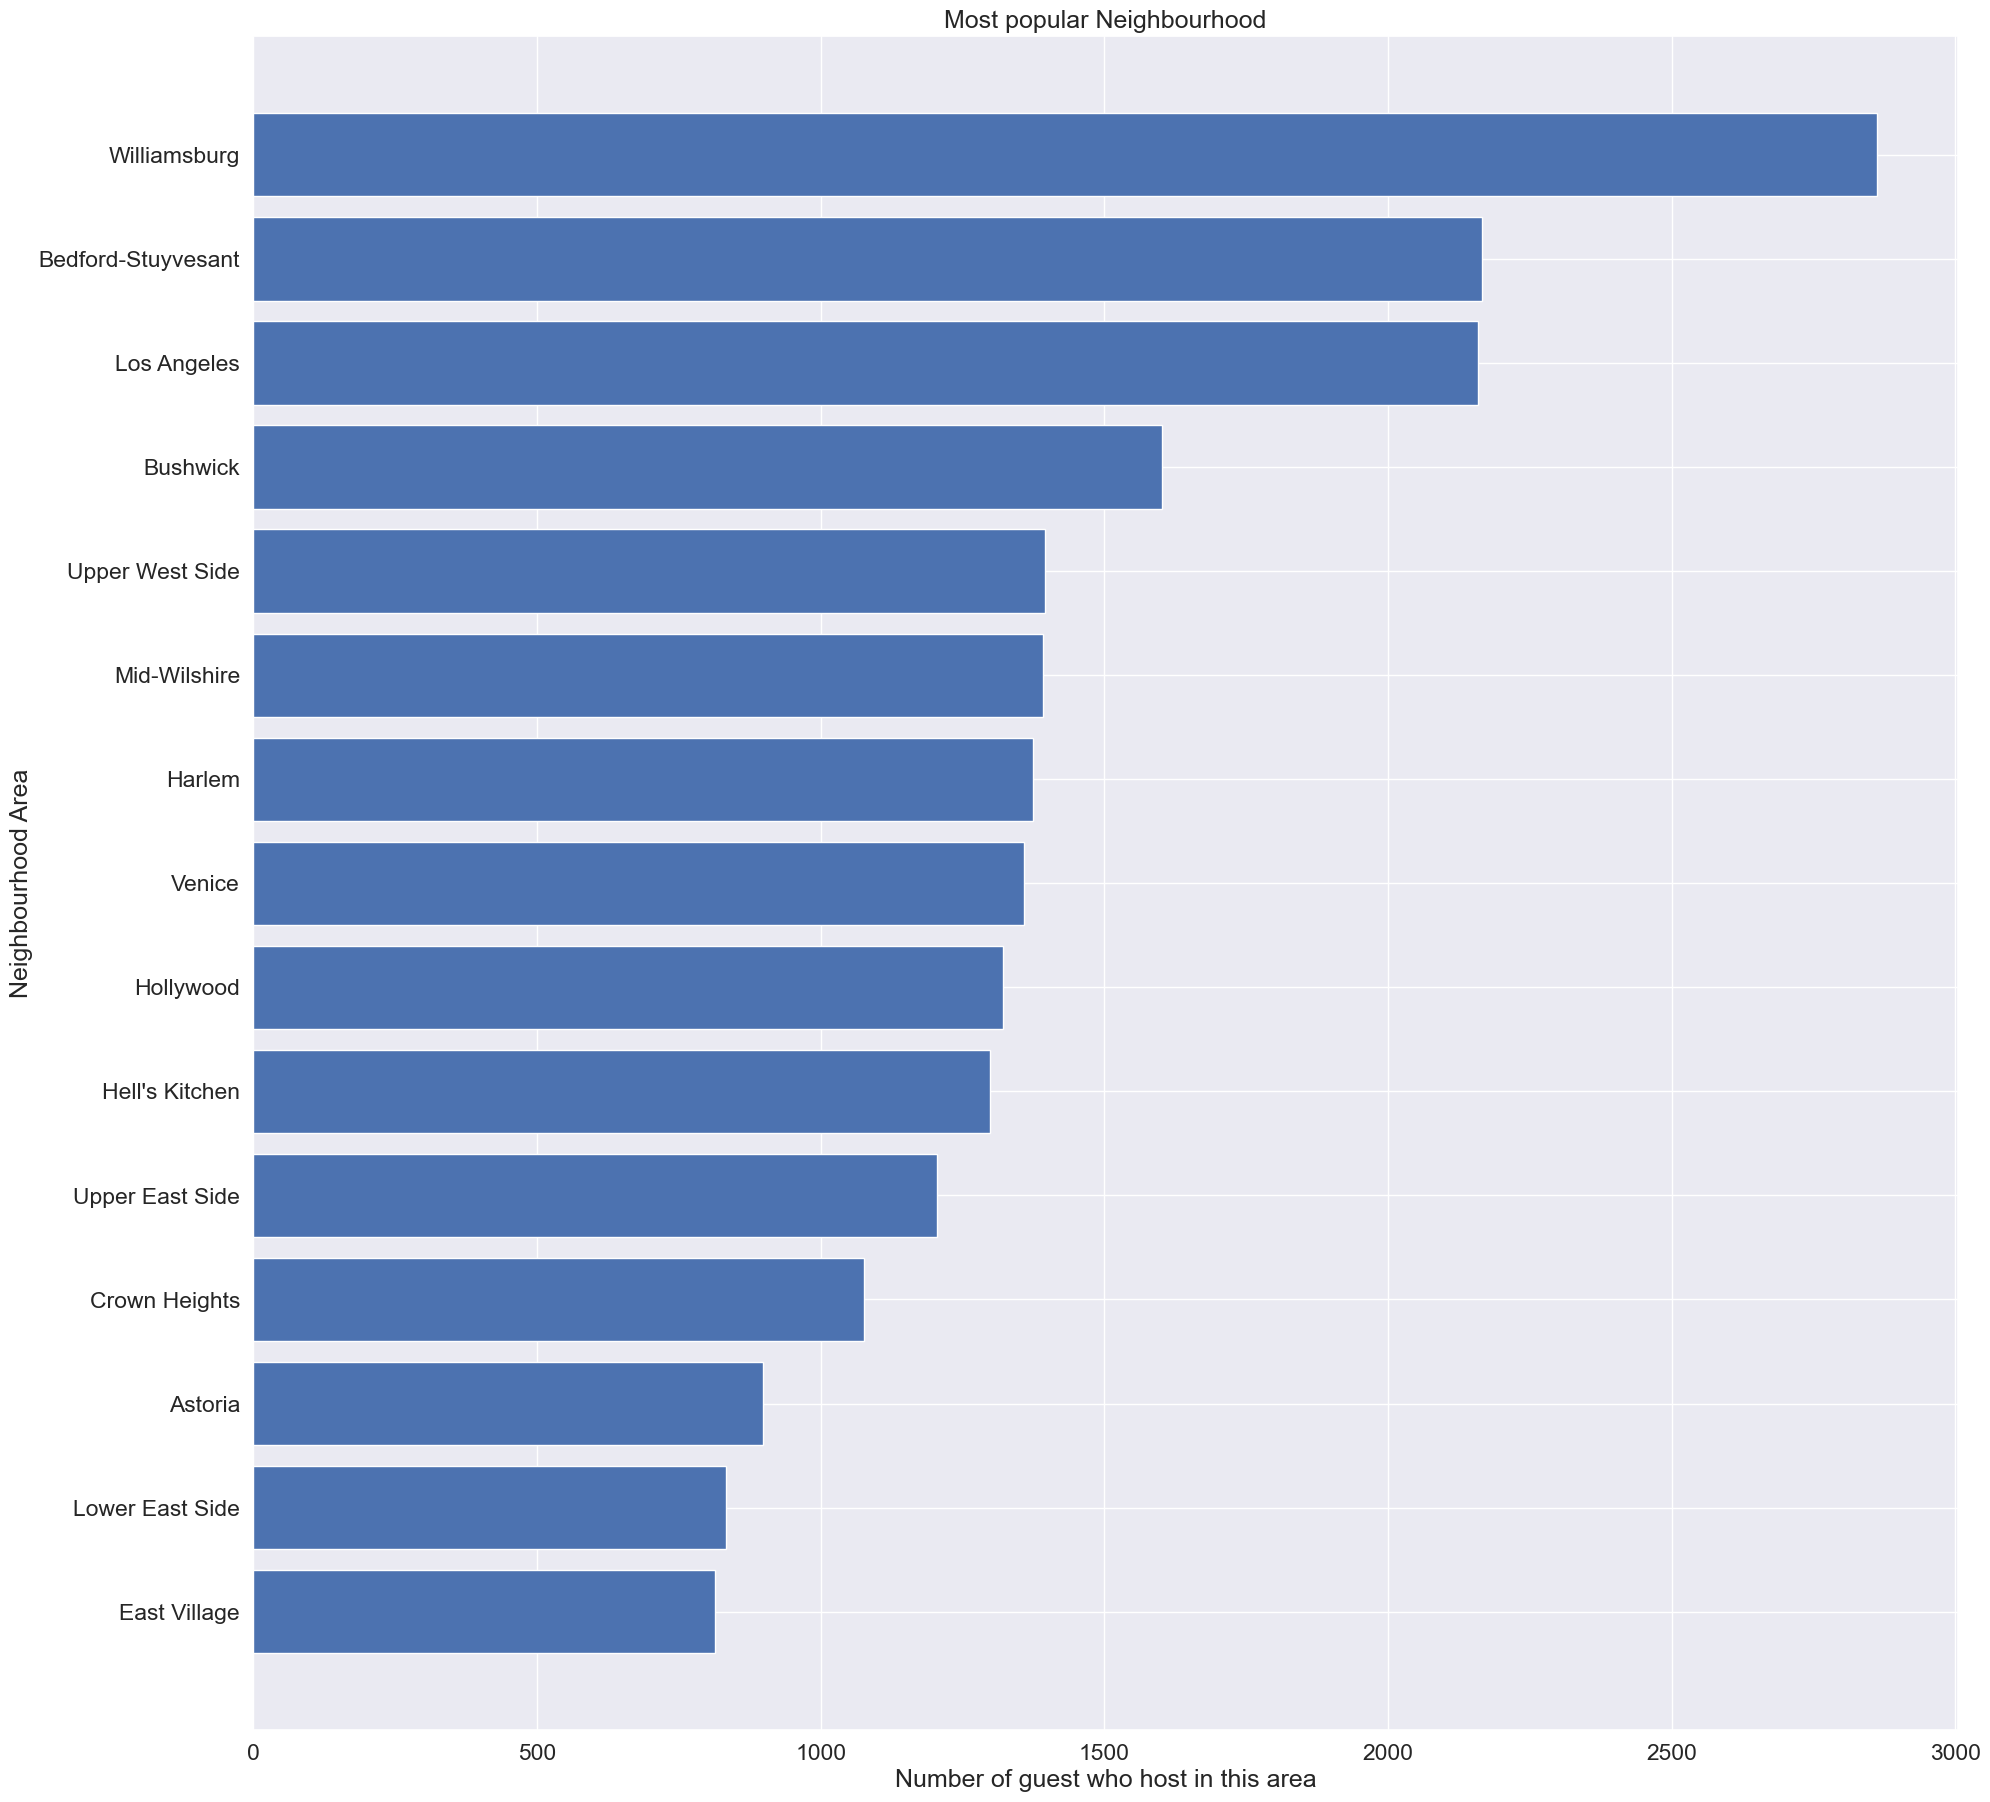

In [70]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

In [71]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation='vertical')
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [72]:
categoric_data = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categoric_data.append(column)
numeric_columns = df.select_dtypes(include=[np.number]).columns

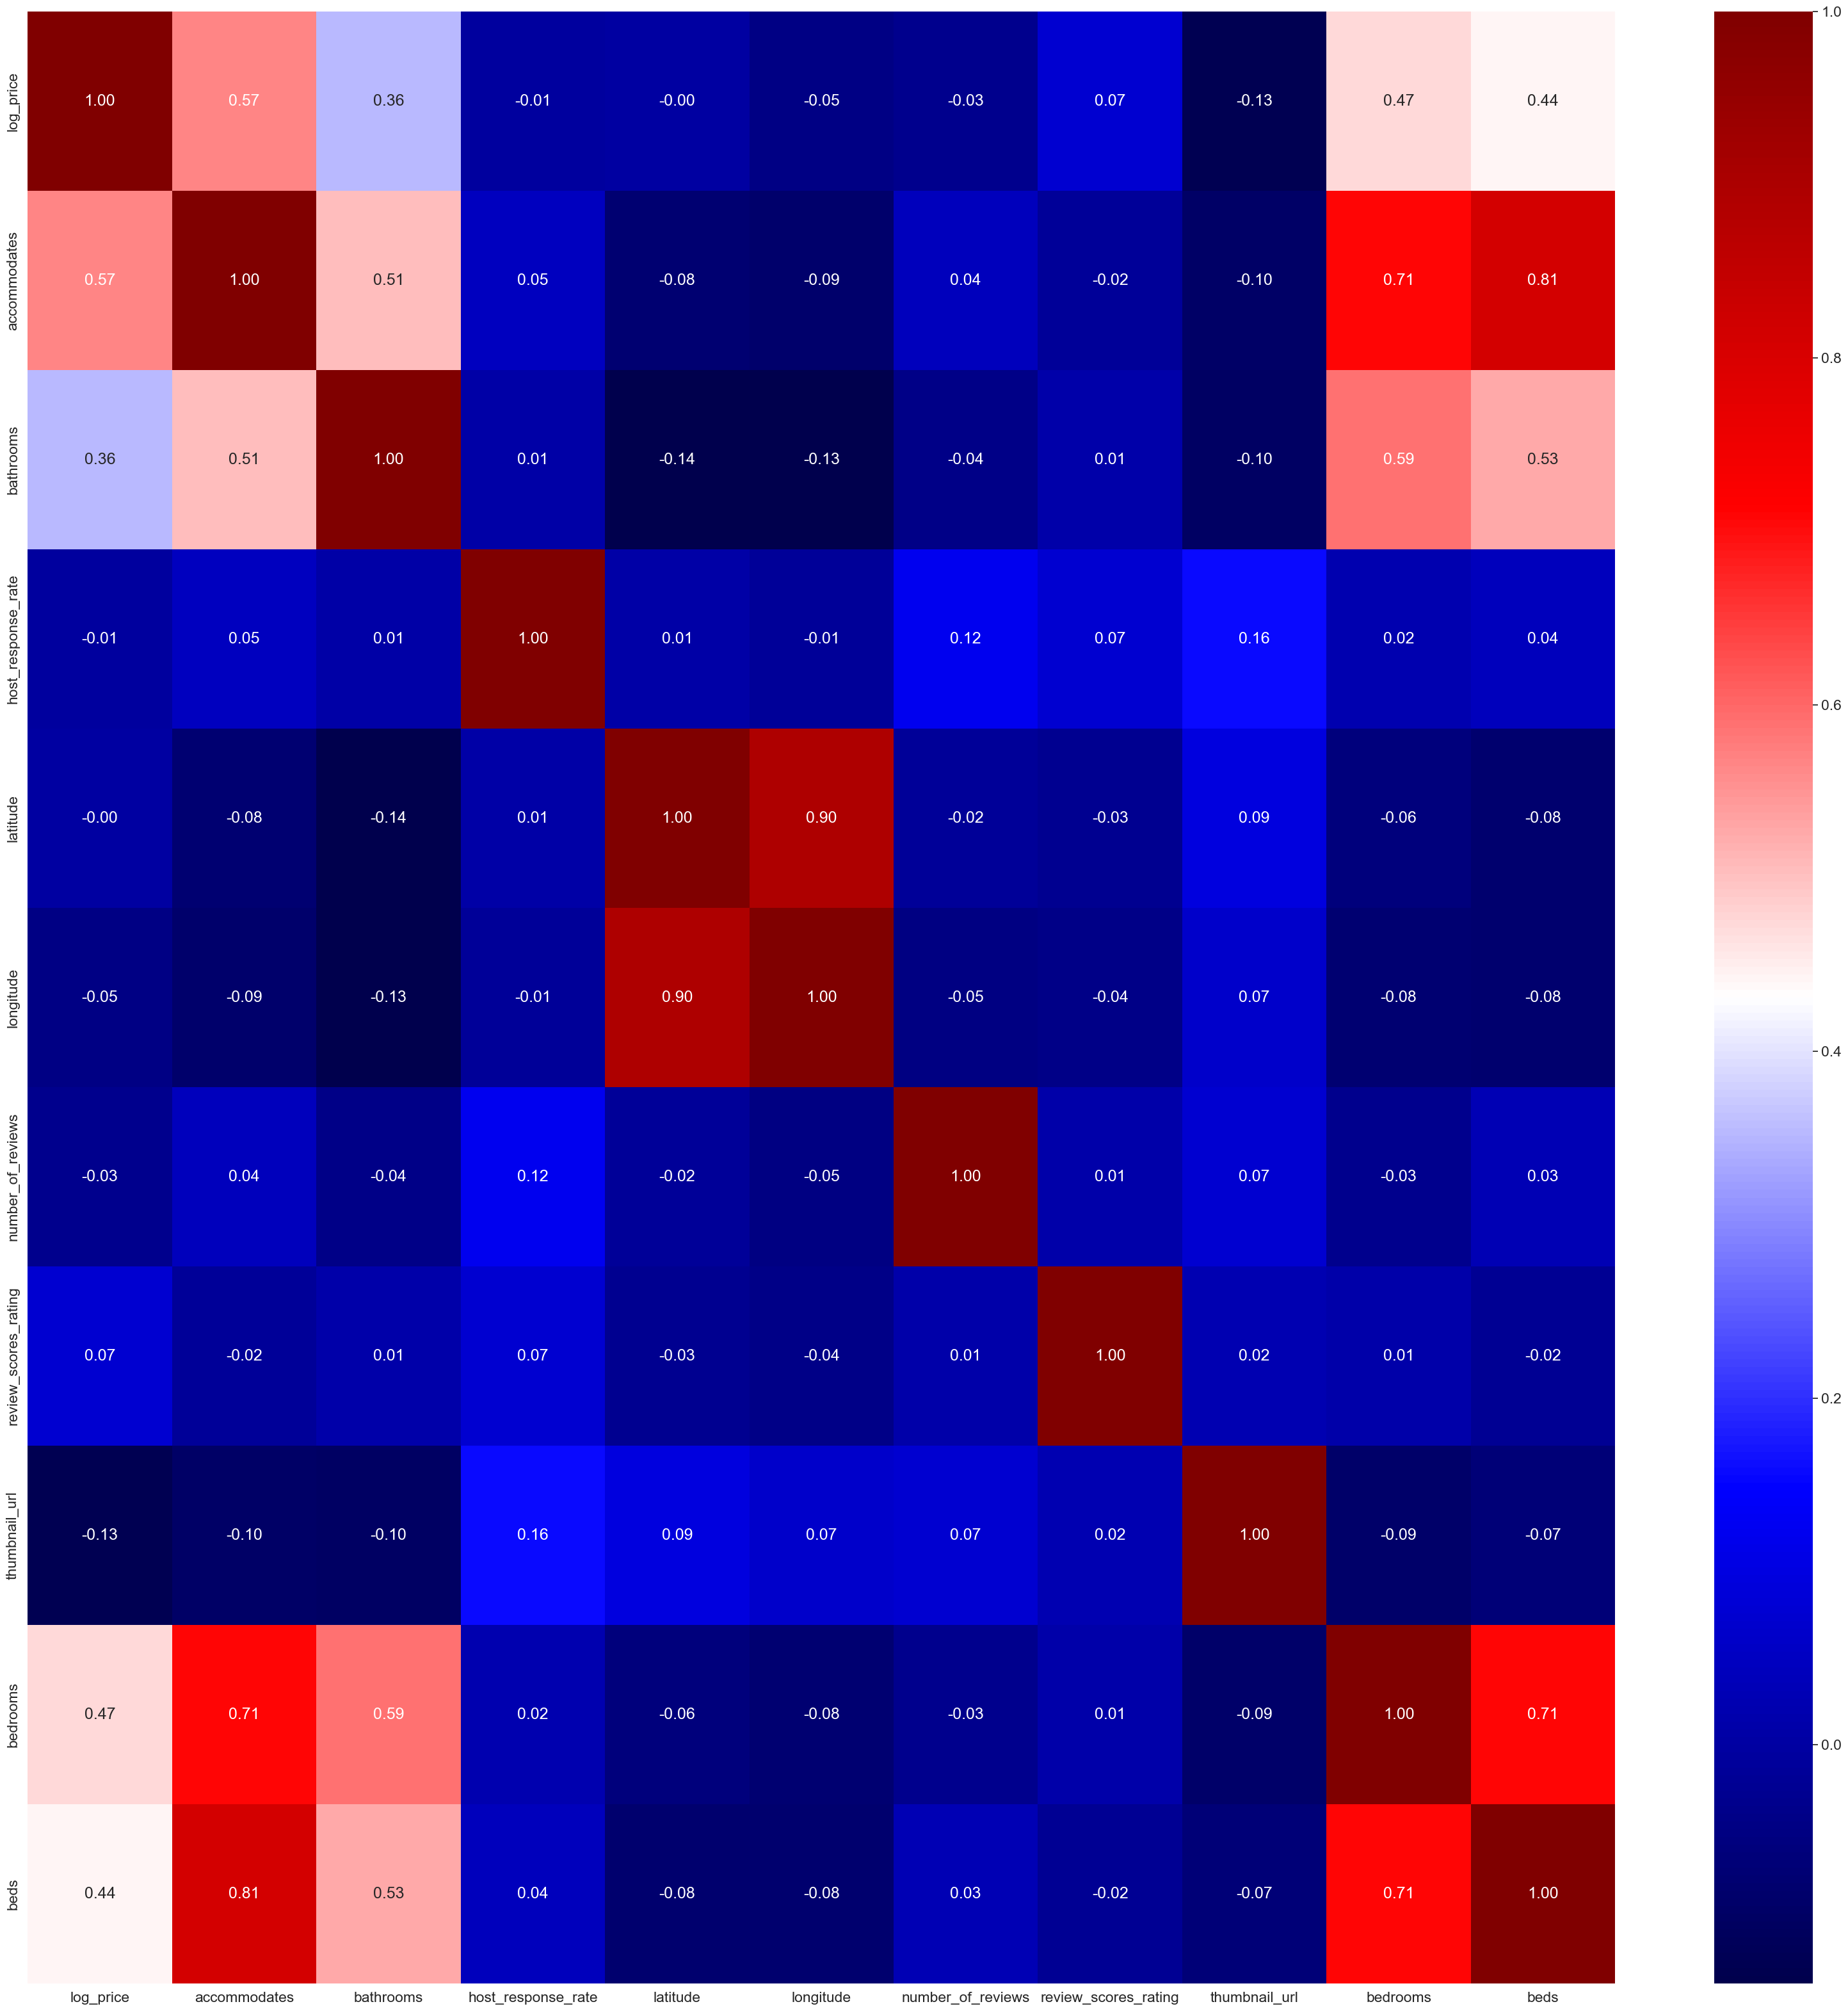

In [73]:
plt.figure(figsize = (40,40))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [74]:
def plot_hist(df,variable):
    plt.figure(figsize=(9, 3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)  # Rotate x-label vertically
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [75]:
grouped_data = df[["neighbourhood", "log_price"]].groupby("neighbourhood").mean()
value_counts = df["neighbourhood"].value_counts()

# Add value counts to the grouped data
grouped_data['Value Counts'] = value_counts
grouped_data.sort_values(by="Value Counts", ascending=False)[:10]

,log_price,Value Counts
neighbourhood,,
Williamsburg,4.740027,2862
Bedford-Stuyvesant,4.423185,2166
Los Angeles,4.607737,2158
Bushwick,4.274465,1601
Upper West Side,5.001347,1396
Mid-Wilshire,4.674082,1392
Harlem,4.636397,1374
Venice,5.118042,1358
Hollywood,4.688395,1321


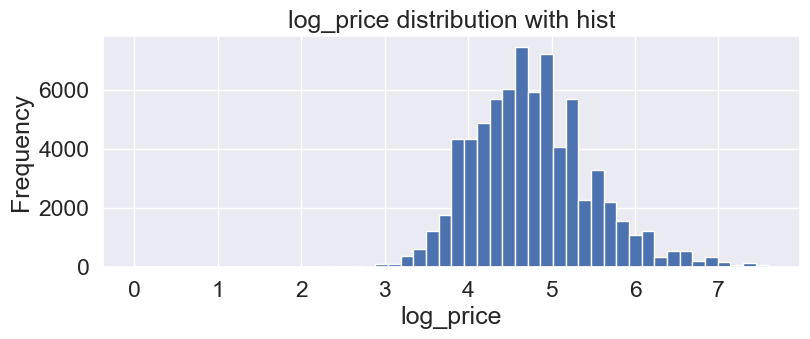

In [77]:

plot_hist(df,'log_price')

#### Relationship between log_price and categorical columns

In [78]:
def groupby_target(column):
    # Relationship between target and categorical columns
    grouped_data = df[[column, "log_price"]].groupby(column).mean().sort_values(by="log_price", ascending=False)
    value_counts = df[column].value_counts()

    # Add value counts to the grouped data
    grouped_data['Value Counts'] = value_counts

    # Print the updated grouped data
    print(grouped_data)
   
    print(50*'--')

In [79]:
for i in categoric_data:
    groupby_target(i)

               log_price  Value Counts
property_type                         
Others         4.871325   5089        
House          4.803129   18754       
Apartment      4.765176   50268       
----------------------------------------------------------------------------------------------------
                 log_price  Value Counts
room_type                               
Entire home/apt  5.167217   41310       
Private room     4.327753   30638       
Shared room      3.861535   2163        
----------------------------------------------------------------------------------------------------
                                                                                                                                                                                                                                                                                                                                                                                                              

#### -Apartmant and house have more impact on price and they are most frequent

#### -Although the price of Entire home/apt are over the mean, they are most preferred.

#### -Bed type consisst of 72000 real bed. We consider this as realbad and others.

#### -Cancellation_policy. As the flexibity increases thhe price also increase. Expensive houses suffer more when the booking is cancelled. Therefore their policies are strickter. Since the extereme values are so few , we will add those in to strict.

#### -cleaning_fee has affect on price. This is not included in price. So extra. People may think it would be cleaner if there is cleaning fee.

#### -Cities have little affet on price ????

#### - accommodates has large affect on price. We will handle outliears.

#### -  bathrooms . Outliears need to be handled ????

#### - host_has_profile_pic this column consist of only 226 false value. So has almost no affect on price

#### - host_identity_verified has no affect. 

#### - Has almost no affexct on price. But has affect on preferebility

#### - bedrooms has large affect on price. Outliears need to be handled

#### - beds has large affect on price. Outliears need to be handled

#### - first_review and last_review. From last review to now, between first and last review , year of first review




In [80]:
def catplot(column):
    if len(df[column].unique()) <= 20:
        g = sns.catplot(x=column, y="log_price", data=df, kind="bar", height=8)
        g.set_ylabels("log_price")
        plt.show()

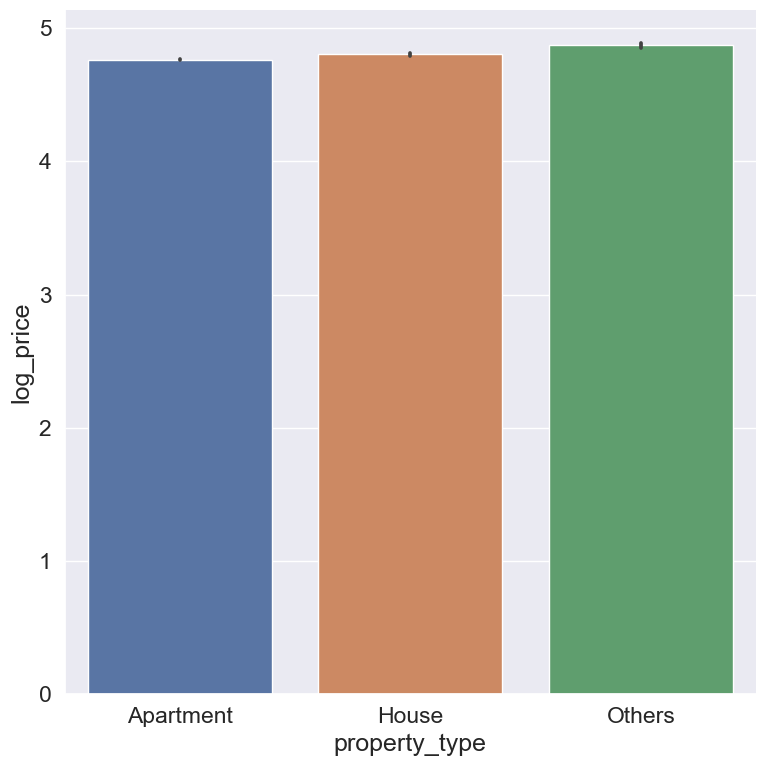

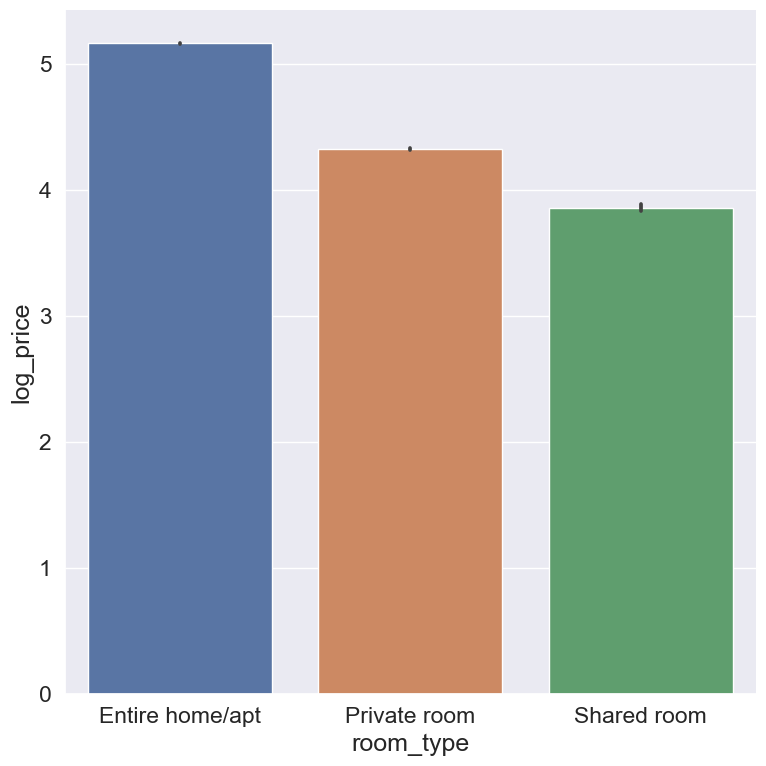

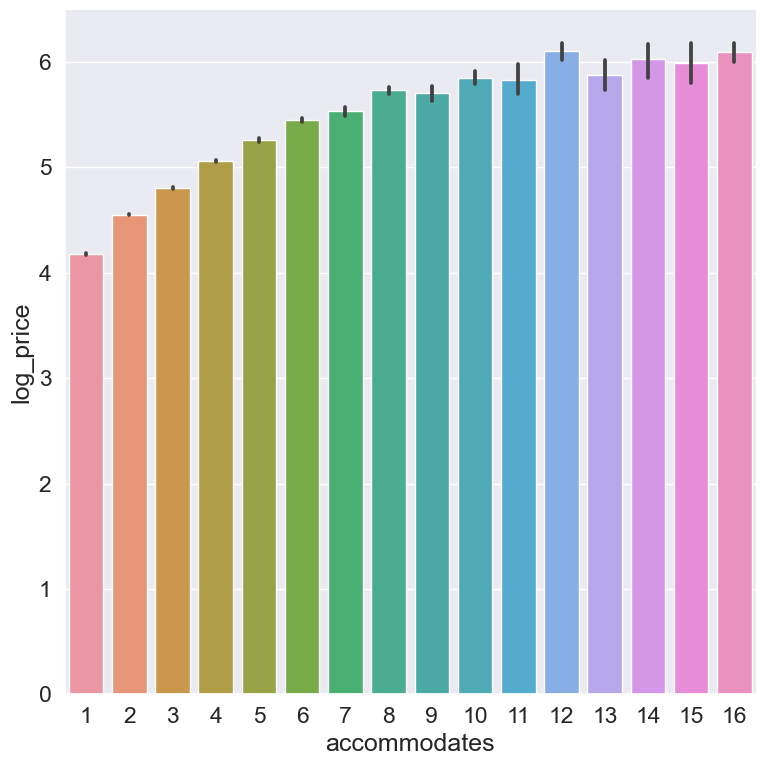

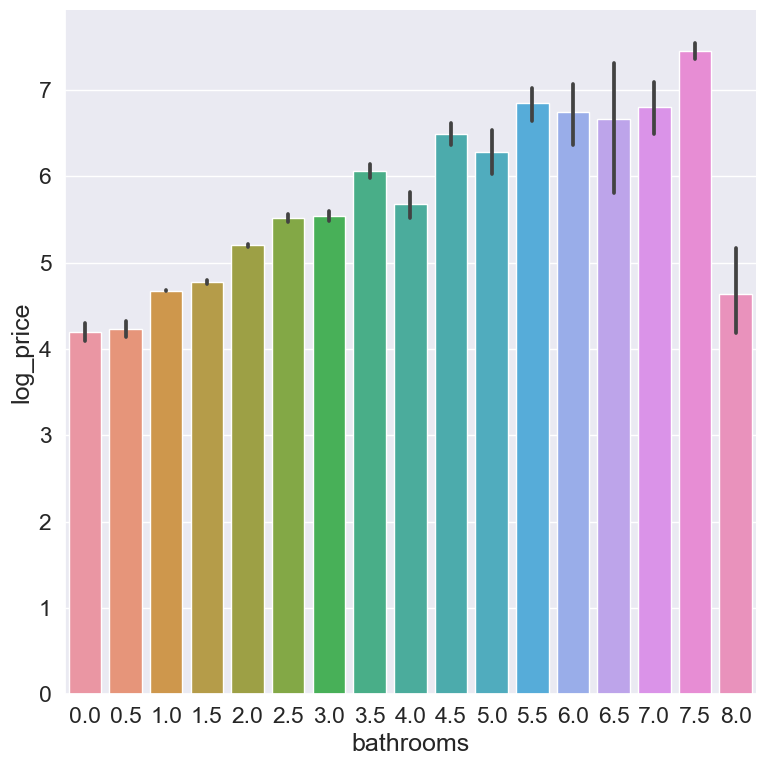

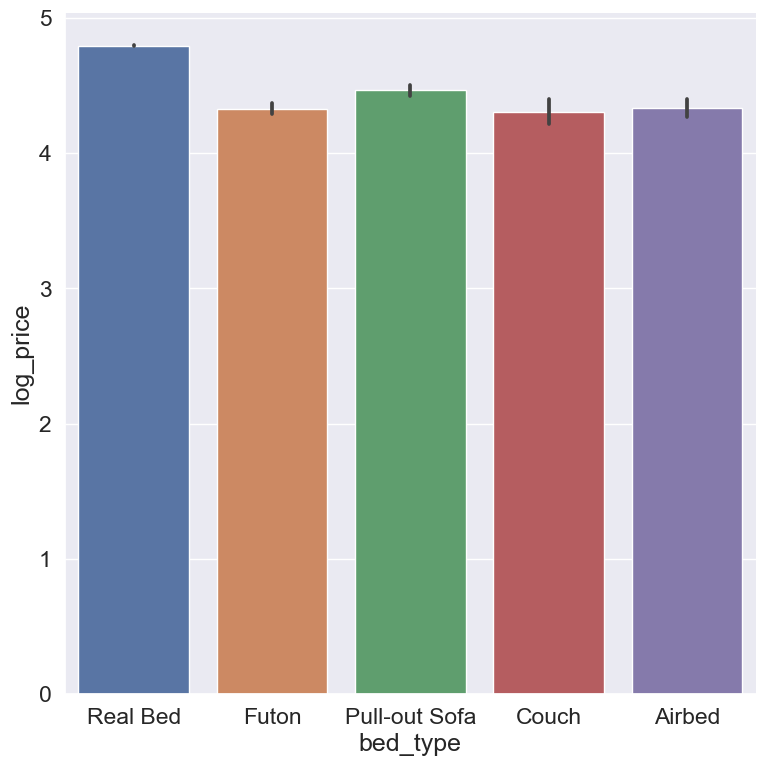

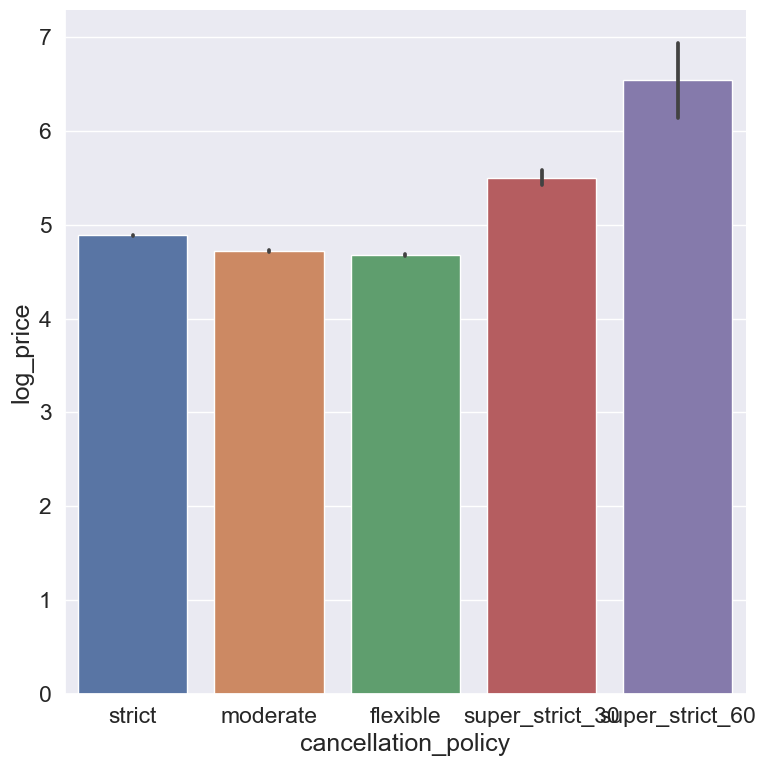

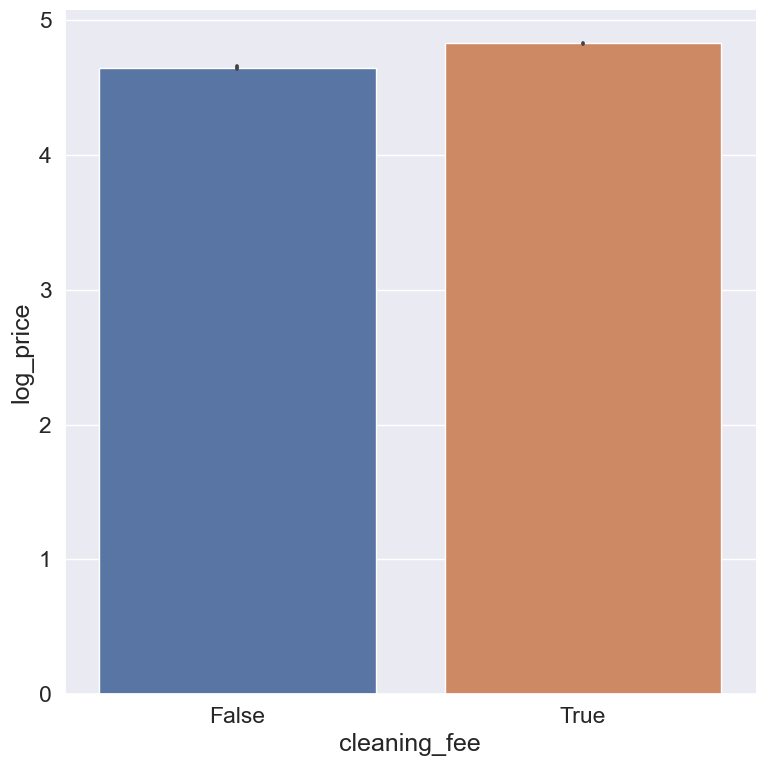

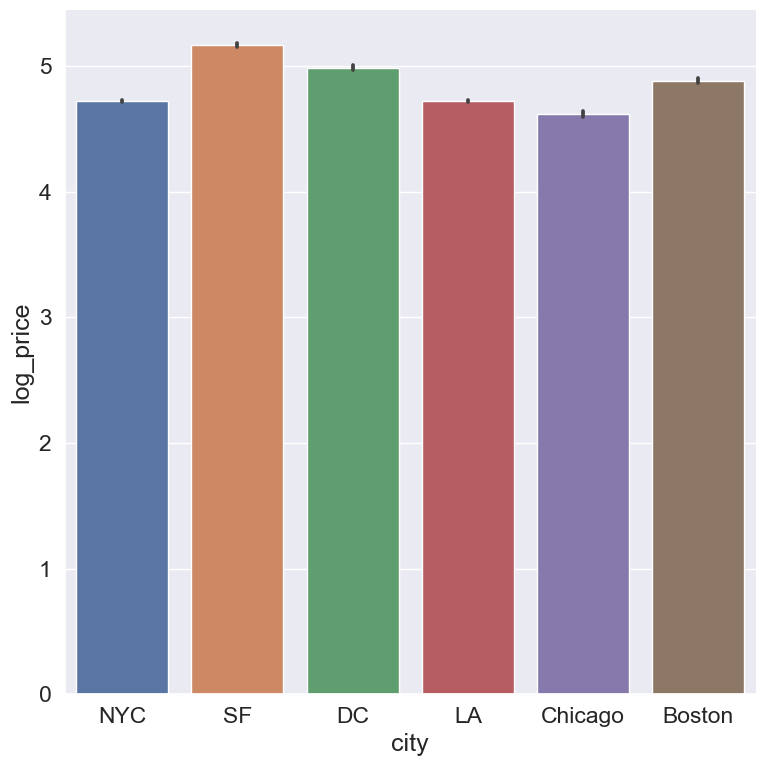

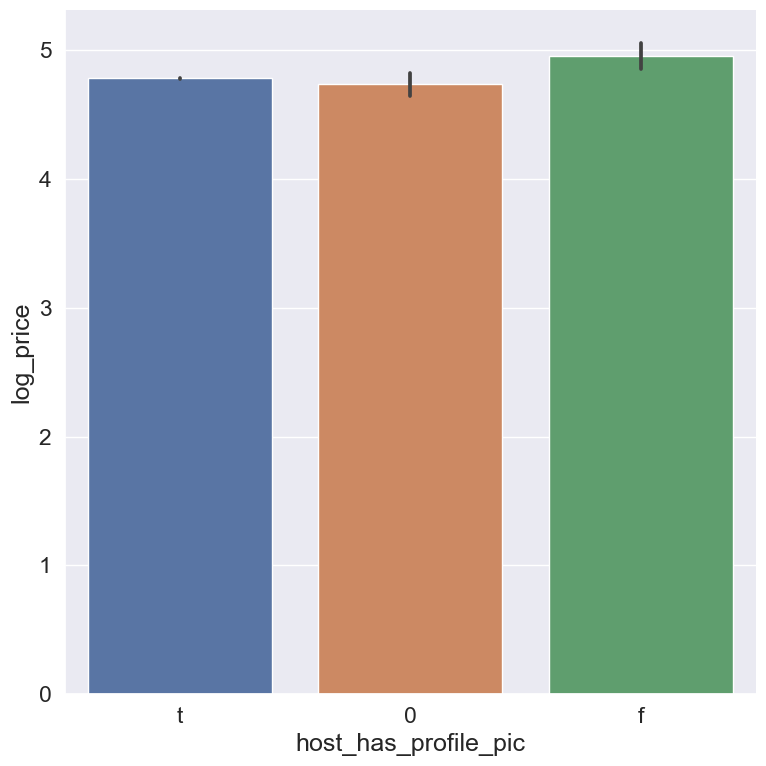

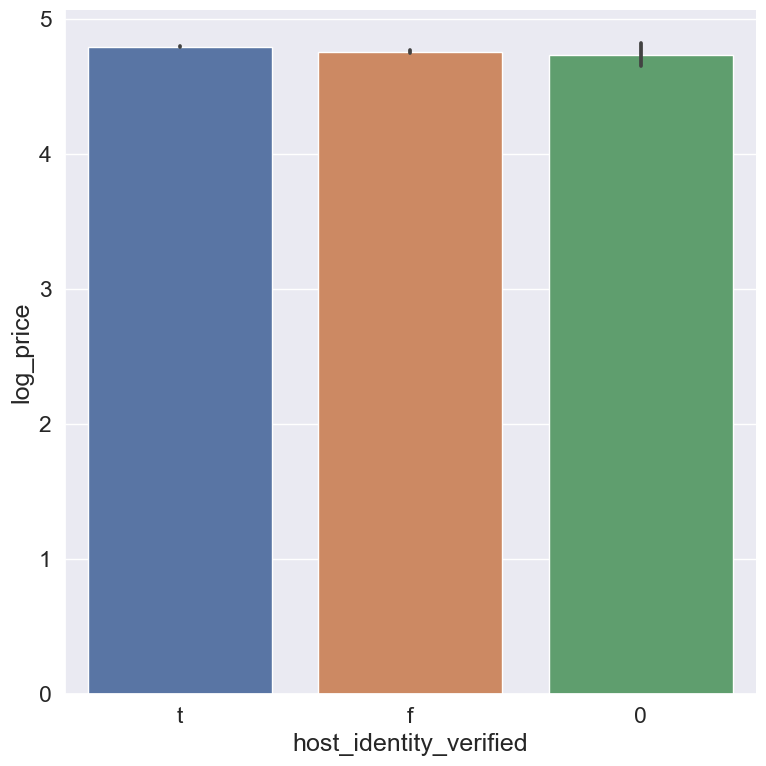

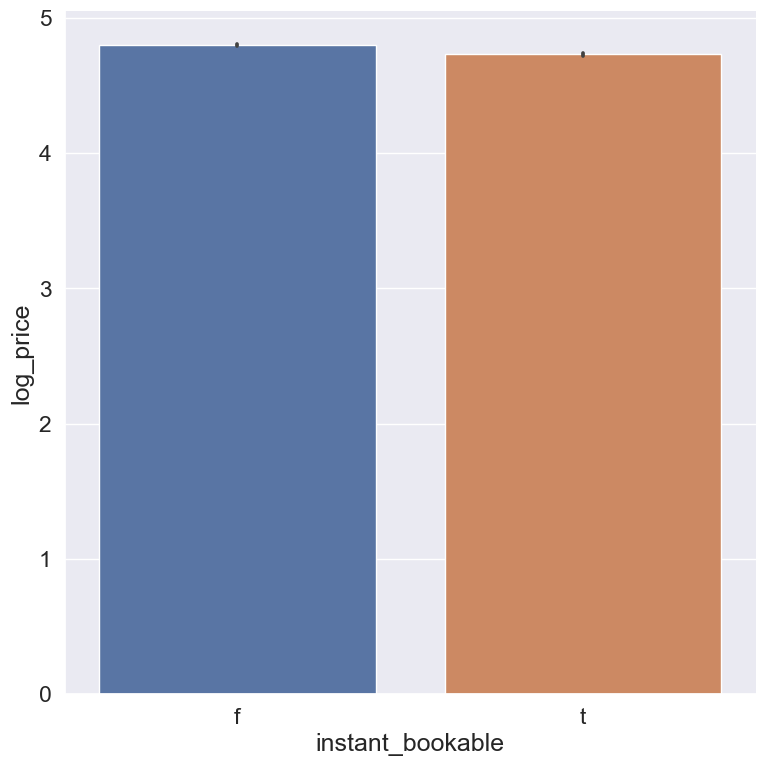

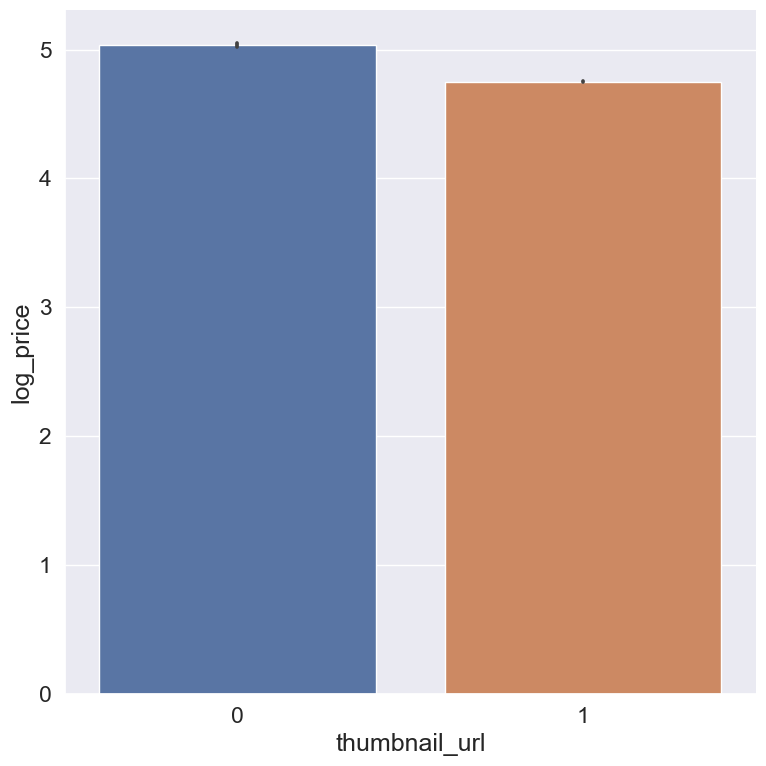

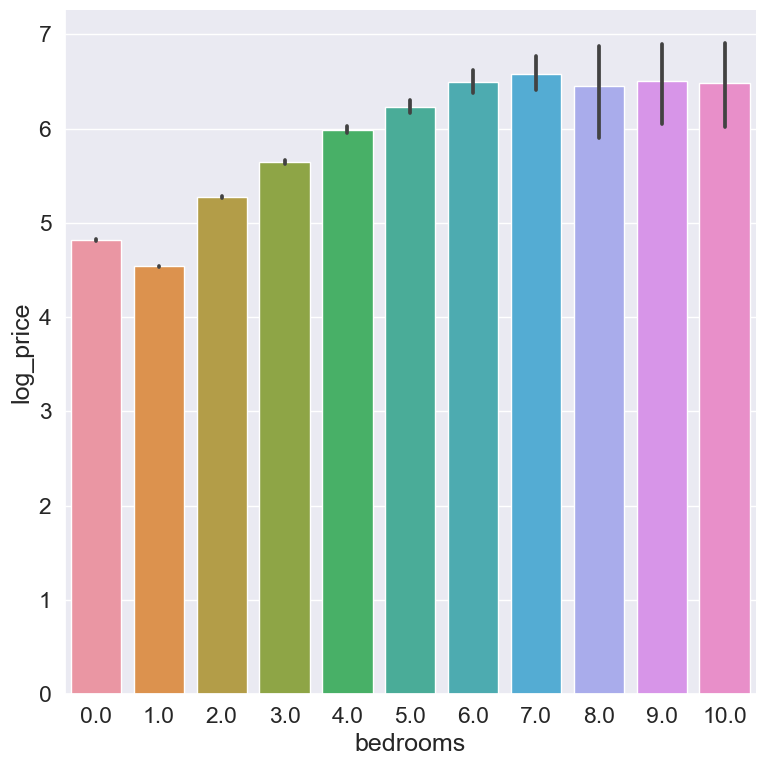

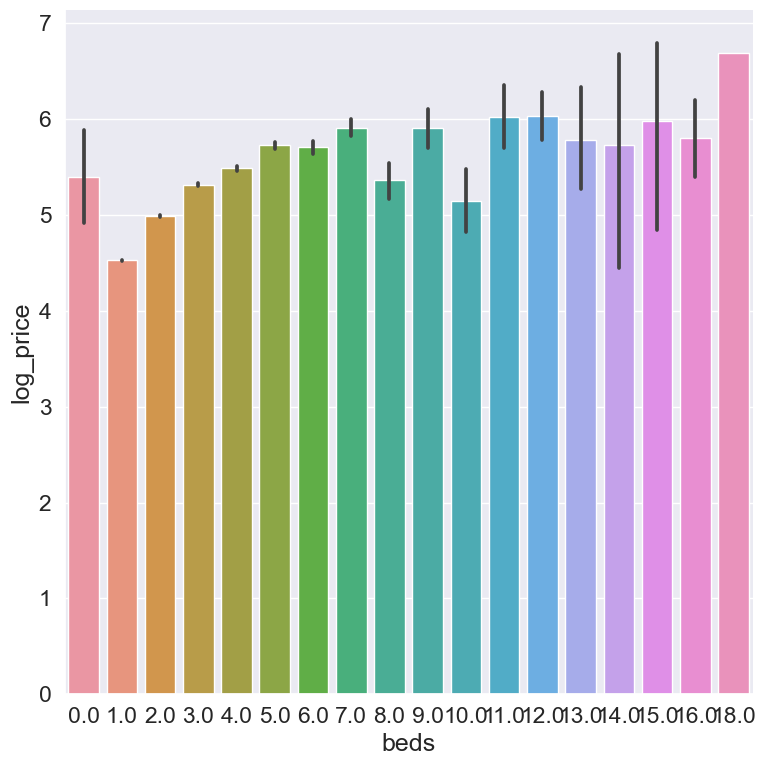

In [81]:
for i in df.columns :
    catplot(i)

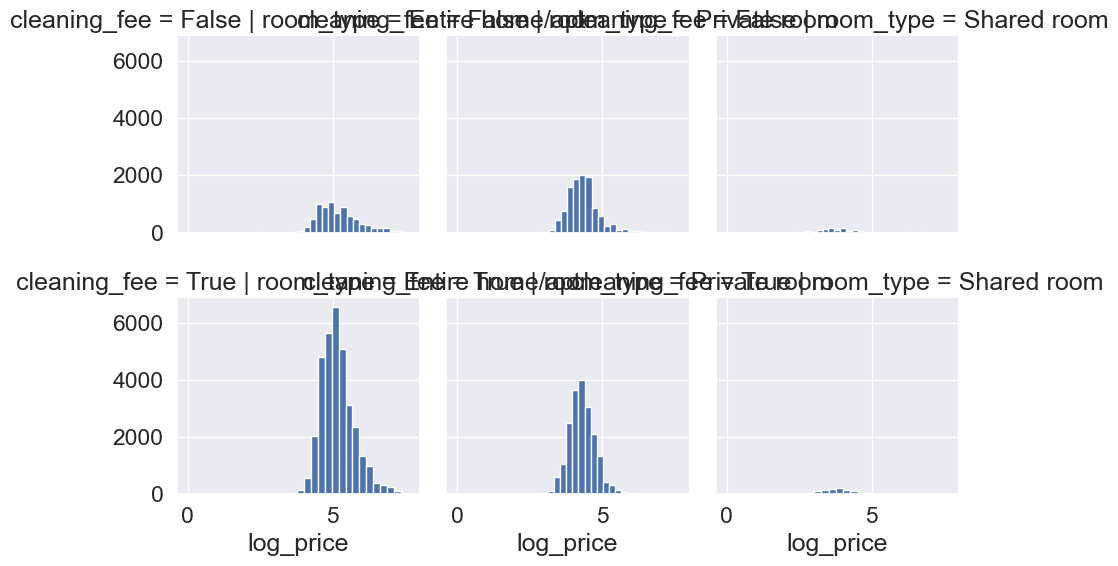

In [82]:
# Duzen yapilacak - unique degerleri az olanlarla denenecek
g = sns.FacetGrid(df, col = "room_type", row = "cleaning_fee")
g.map(plt.hist, "log_price", bins = 25)

plt.show()

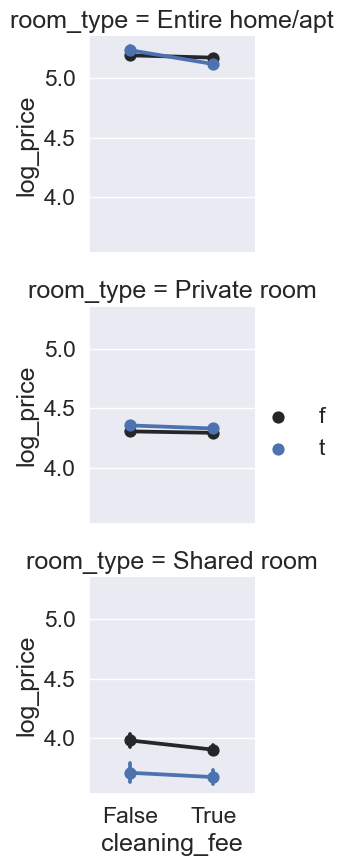

In [83]:
# ayni sekilde

g = sns.FacetGrid(df, row = "room_type")
g.map(sns.pointplot, "cleaning_fee","log_price","instant_bookable")
g.add_legend()
plt.show()

In [85]:
# # ayni sekilde
# g = sns.FacetGrid(df, row = "Embarked", col = "Survived", size = 2.3)
# g.map(sns.barplot, "Sex", "Fare")
# g.add_legend()
# plt.show()

#### -neighbourhood. Williamsburg is most populer. Its open to further calculations

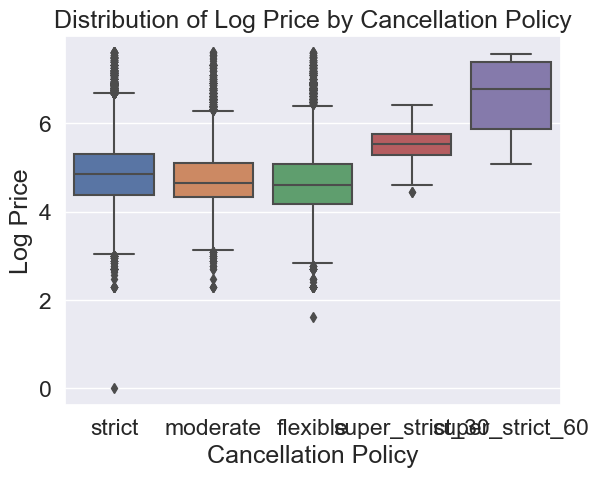

In [86]:
import seaborn as sns

sns.boxplot(x="cancellation_policy", y="log_price", data=df)
plt.xlabel("Cancellation Policy")
plt.ylabel("Log Price")
plt.title("Distribution of Log Price by Cancellation Policy")
plt.show()

In [87]:
def box_plot_target(df,column):
    sns.boxplot(x=column, y="log_price", data=df)
    plt.xlabel(f"{column}")
    plt.ylabel("Log Price")
    plt.title(f"Distribution of Log Price by {column}")
    plt.show()

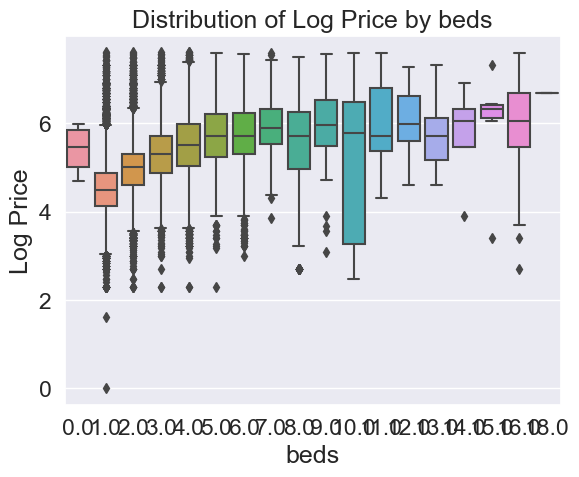

In [88]:
box_plot_target(df,'beds')

# OUTLIER HANDLE

In [89]:
def show_outliers(df,column):
    '''
    Visialize outliers of given column
    '''
    plt.figure(figsize=(8, 6))
    plt.boxplot(x=df[column],patch_artist=True ,boxprops=dict(facecolor='lightblue', linewidth=2, edgecolor='black'))
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title('Outliers Plot of '+ column)
    plt.show()

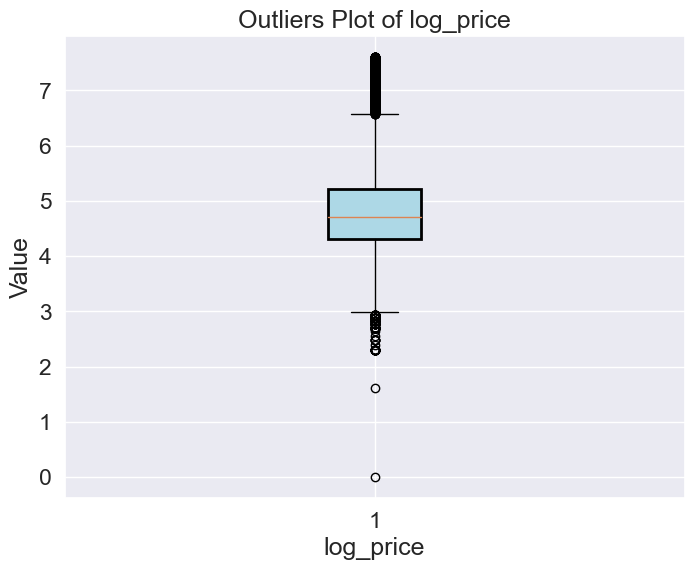

In [90]:
#check outliers
show_outliers(df,'log_price')

#### First method of handling outliers with IQR and quantiles

In [91]:
def outliers_iqr(df,column):
    '''
    first method of handling outliers with IQR and quantiles
    '''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    df_clean = df[(df[column] > (Q1 - threshold * IQR)) & (df[column] < (Q3 + threshold * IQR))]
    print("max value is : ",df_clean[column].max())
    print("min value is : ",df_clean[column].min())
    print((df.shape[0]-df_clean.shape[0])," rows removed in total")
    
    return df_clean

In [92]:
df_iqr = outliers_iqr(df,"log_price")

max value is :  6.572282542694008
min value is :  2.995732273553992
1532  rows removed in total


In [93]:
df_iqr = outliers_iqr(df_iqr,"number_of_reviews")

max value is :  58
min value is :  0
7814  rows removed in total


In [94]:
# lets the diffreence
def compare_dist(df,df1,column):
    plot_hist(df,column)
    plot_hist(df1,column)


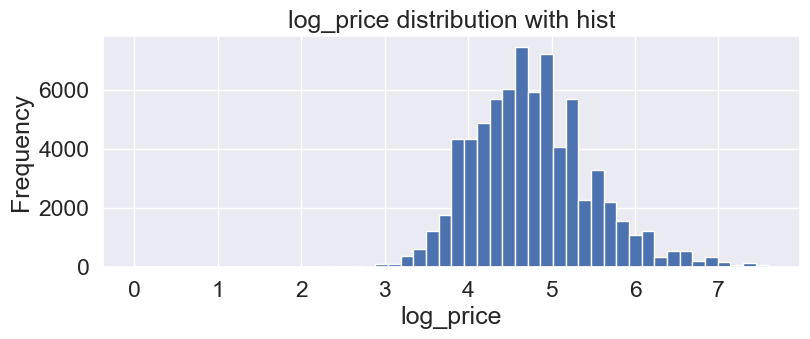

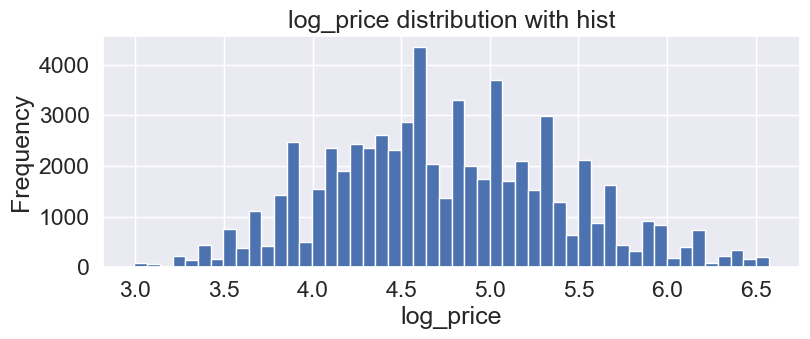

In [95]:
compare_dist(df,df_iqr,"log_price") # IQR method before and after

#### Second method of handling outliers by determining min and max value via quantiles

In [96]:
def remove_outliers(df, column, q1, q2):
    '''
    Second method of handling outliers with determining 'min' and 'max' value
    '''
    min_val = df[column].quantile(q1)
    max_val = df[column].quantile(q2)
    
    df_cleaned = df.loc[(df[column] >= min_val) & (df[column] <= max_val)].copy()
    print("max value is : ",df_cleaned[column].max())
    print("min value is : ",df_cleaned[column].min())
    print((df.shape[0]-df_cleaned.shape[0])," rows removed")
    return df_cleaned




In [97]:
cleaned_df = remove_outliers(df, 'log_price', 0.001, 0.998)

max value is :  7.3132203870903005
min value is :  2.7080502011022096
137  rows removed


In [98]:
cleaned_df =remove_outliers(cleaned_df,"number_of_reviews",0.01, 0.9997)

max value is :  388
min value is :  0
23  rows removed


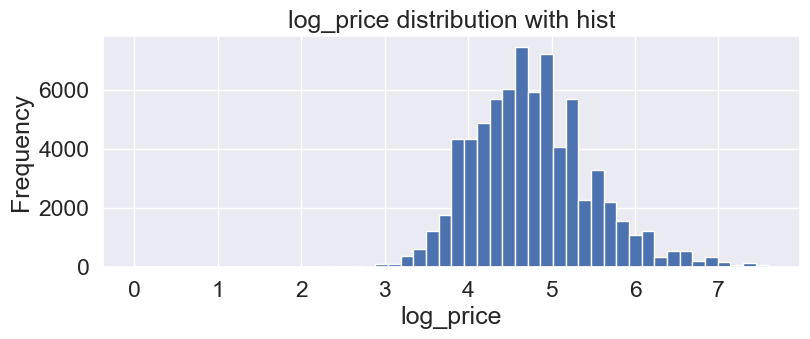

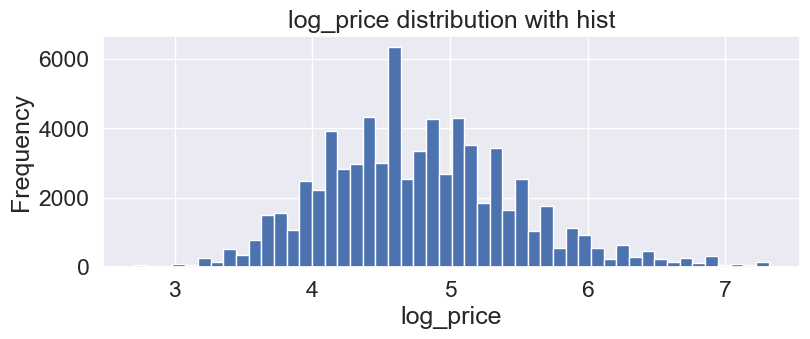

In [99]:
compare_dist(df,cleaned_df,"log_price") # min_max method before and after

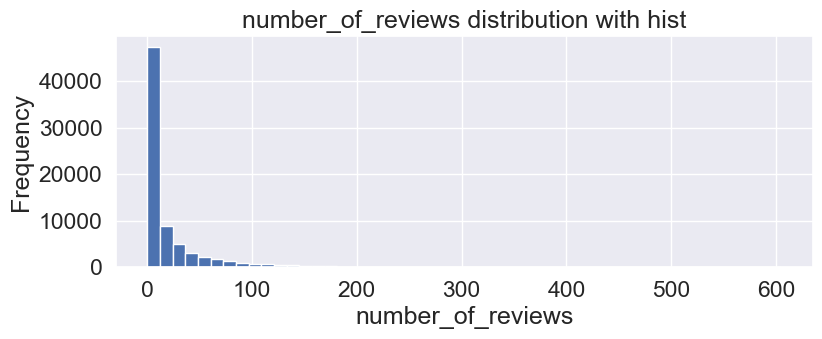

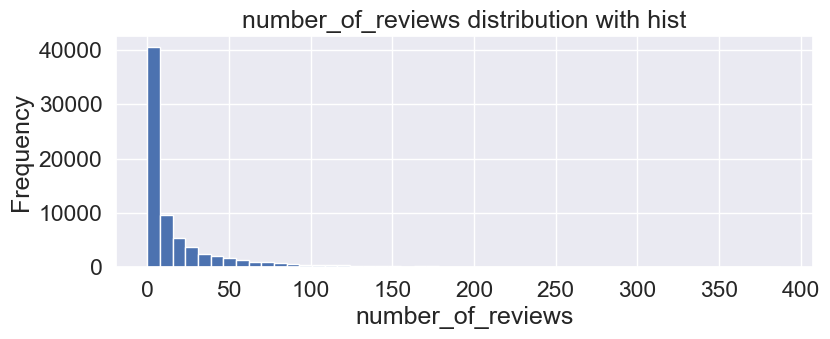

In [100]:
compare_dist(df,cleaned_df,"number_of_reviews") # min_max method before and after

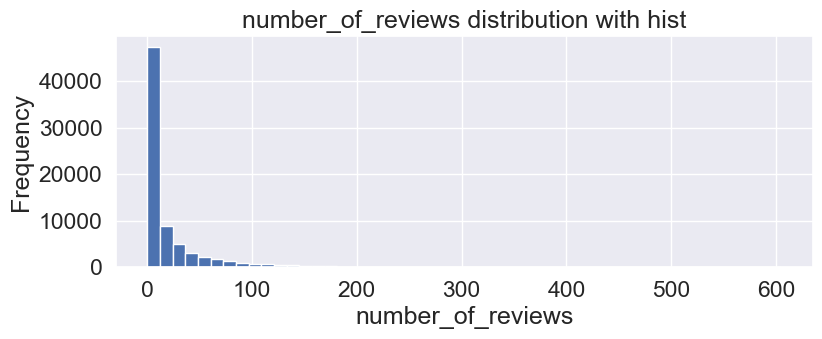

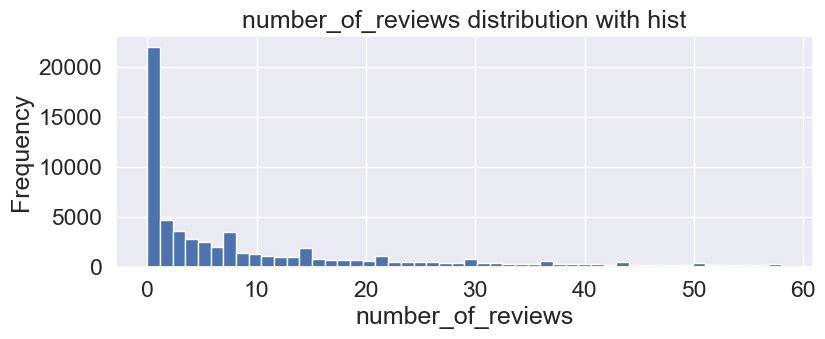

In [101]:
compare_dist(df,df_iqr,"number_of_reviews") # IQR method before and after

In [102]:
def compare_outliers(df,df1,column):
    '''
    Compares before handling and after handling outliers
    '''
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()

    plt.boxplot(x=df1[column],patch_artist=True ,boxprops=dict(facecolor='lightblue', linewidth=2, edgecolor='black'))
    # plt.boxplot(x=cleaned_df["log_price"])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()

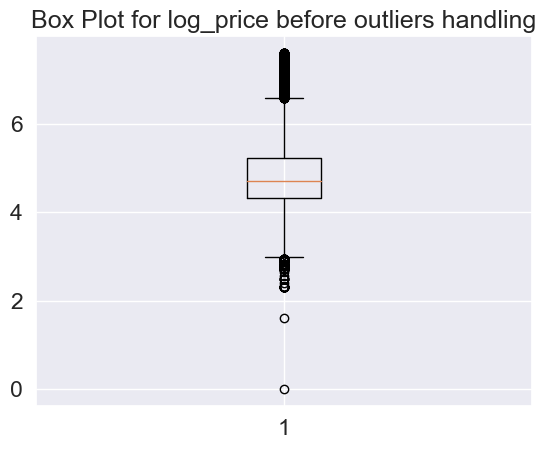

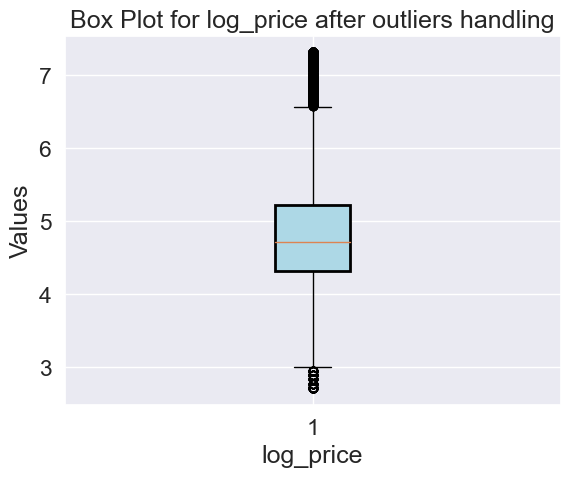

In [103]:
compare_outliers(df,cleaned_df,"log_price")  # min_max method

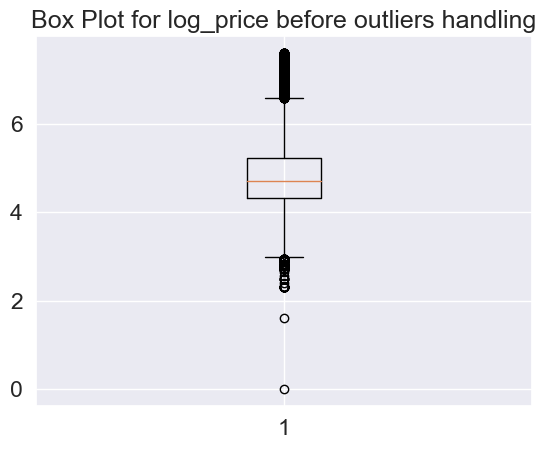

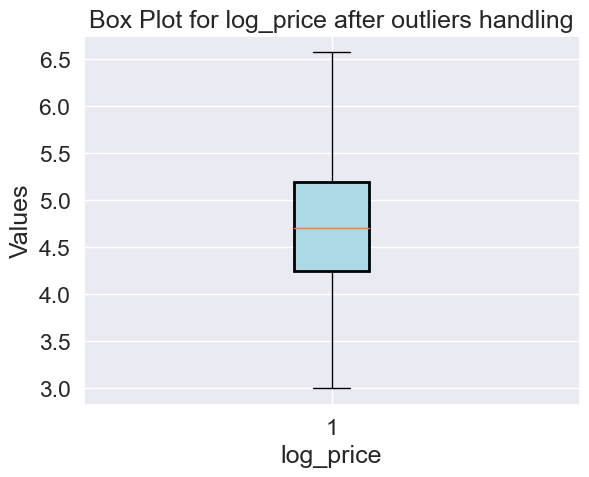

In [104]:
compare_outliers(df,df_iqr,"log_price")  # IQR method

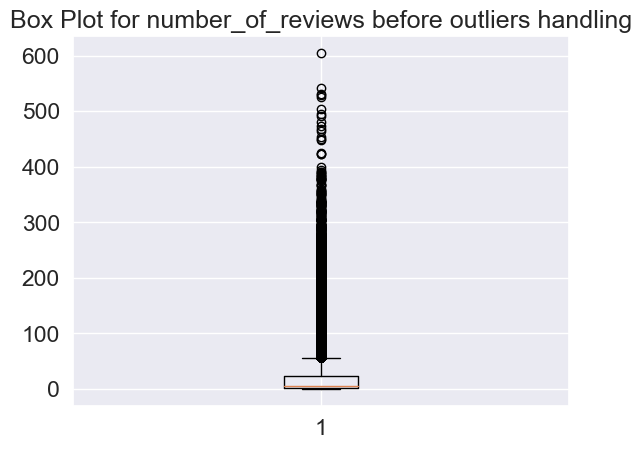

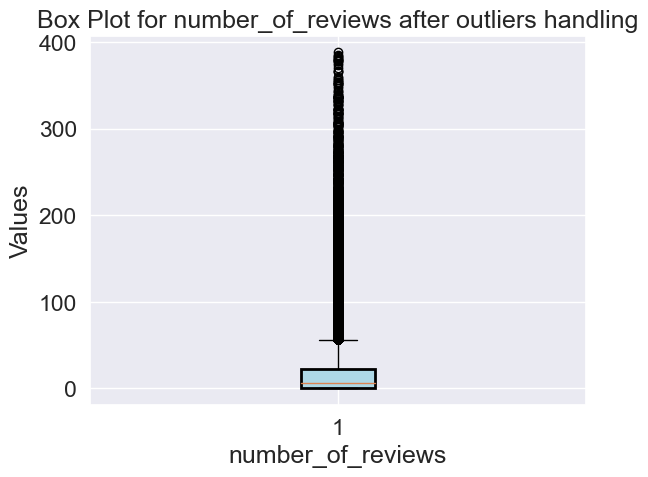

In [105]:
compare_outliers(df,cleaned_df,"number_of_reviews")  # min_max method

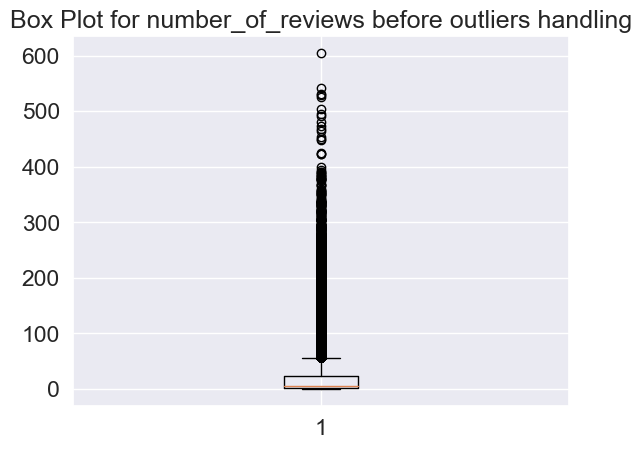

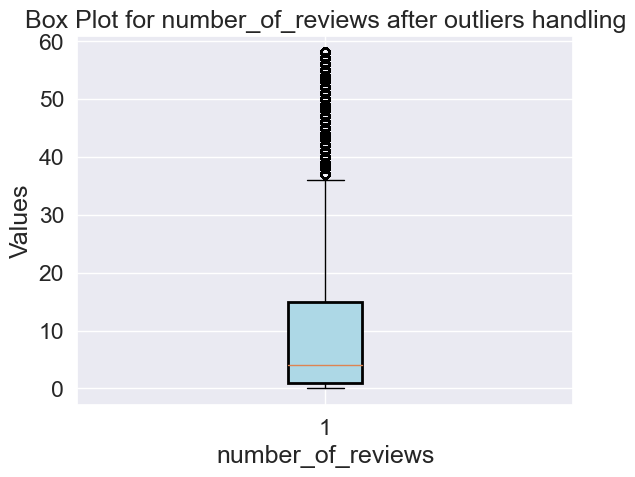

In [106]:
compare_outliers(df,df_iqr,"number_of_reviews") # IQR method

# FEATURE ENGINEERING

In [136]:
cleaned_df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 0    
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              15780
host_has_profile_pic      0    
host_identity_verified    0    
host_response_rate        18247
host_since                0    
instant_bookable          0    
last_review               15743
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             0    
number_of_reviews         0    
review_scores_rating      0    
thumbnail_url             0    
zipcode                   0    
bedrooms                  0    
beds                      0    
dtype: int64

## city

In [137]:
cleaned_df['city']

0        NYC
1        NYC
2        NYC
3        SF 
4        DC 
         .. 
74106    NYC
74107    LA 
74108    NYC
74109    NYC
74110    LA 
Name: city, Length: 73951, dtype: object

In [138]:
#cleaned_df = pd.concat([df, pd.get_dummies(df['city'])], axis=1)

## last review

In [139]:
# Converting to datetime
cleaned_df.first_review = pd.to_datetime(cleaned_df.first_review) 

In [140]:
# we create a new column named 'time_since_last_review'
import datetime
cleaned_df['time_since_last_review'] = (datetime.datetime.today() - pd.to_datetime(cleaned_df['last_review'])).dt.days
cleaned_df['time_since_last_review']

0        2552.0
1        2120.0
2        2129.0
3       NaN    
4        2364.0
          ...  
74106   NaN    
74107    2281.0
74108    2133.0
74109   NaN    
74110    2266.0
Name: time_since_last_review, Length: 73951, dtype: float64

In [141]:
#we check corelation between log_price
correlation = cleaned_df['time_since_last_review'].corr(cleaned_df['log_price'])
correlation

0.019541077206560818

## host since

In [142]:
cleaned_df.host_since = pd.to_datetime(cleaned_df.host_since) # Converting to datetime

In [143]:
# we create a new column named 'host_since_day'
import datetime
cleaned_df['host_since_day'] = (datetime.datetime.today() - pd.to_datetime(cleaned_df['host_since'])).dt.days
cleaned_df['host_since_day']

0        4127
1        2216
2        2453
3        3008
4        3057
         ... 
74106    3764
74107    2628
74108    4208
74109    2126
74110    3882
Name: host_since_day, Length: 73951, dtype: int64

In [144]:
#we check corelation between log_price
correlation = cleaned_df['host_since_day'].corr(cleaned_df['log_price'])
correlation

0.07944677146631651

## host_response_rate

In [145]:
# Bin into four categories
cleaned_df.host_response_rate = pd.cut(cleaned_df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
cleaned_df.host_response_rate = cleaned_df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
cleaned_df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
cleaned_df.host_response_rate.value_counts()

100%       43181
unknown    18247
50-89%     7273 
90-99%     3180 
0-49%      2070 
Name: host_response_rate, dtype: int64

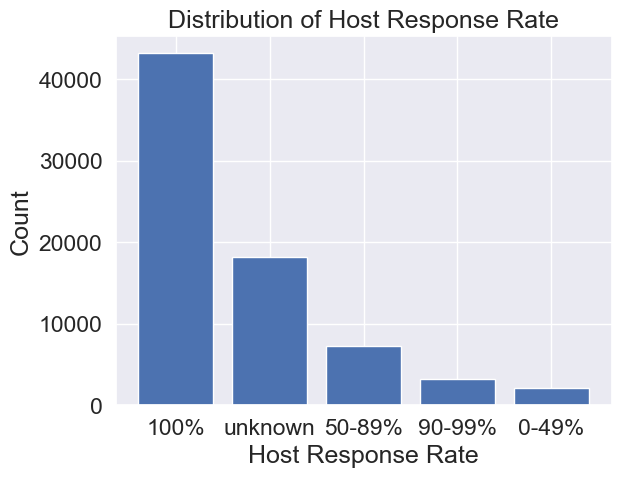

In [146]:
import matplotlib.pyplot as plt

plt.bar(cleaned_df.host_response_rate.value_counts().index, cleaned_df.host_response_rate.value_counts().values)
plt.xlabel('Host Response Rate')
plt.ylabel('Count')
plt.title('Distribution of Host Response Rate')
plt.show()


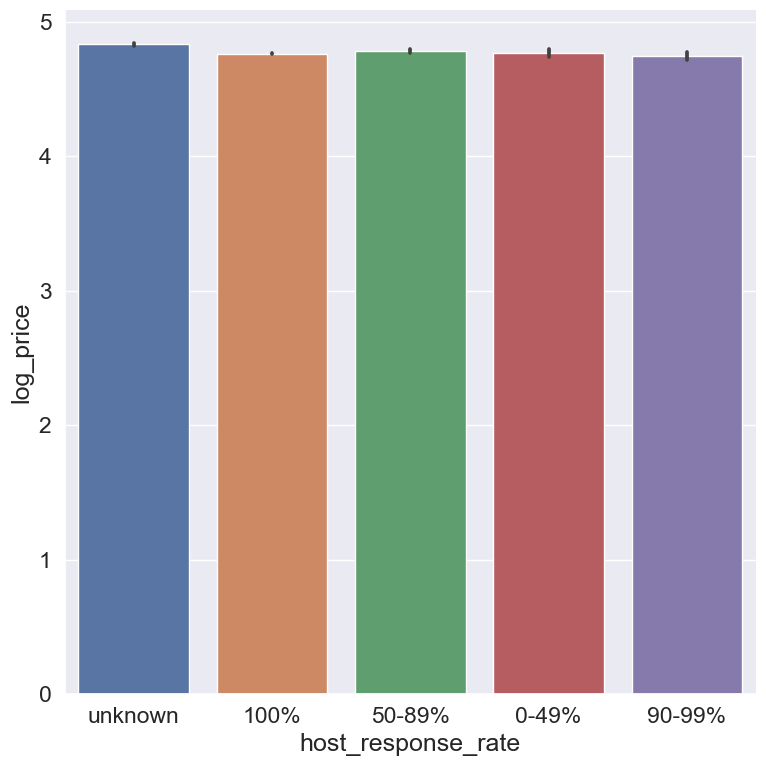

In [147]:
catplot('host_response_rate')

## review_scores_rating

In [148]:
cleaned_df['review_scores_rating']

0        100.000000
1        93.000000 
2        92.000000 
3        94.067365 
4        40.000000 
           ...     
74106    94.067365 
74107    93.000000 
74108    94.000000 
74109    94.067365 
74110    96.000000 
Name: review_scores_rating, Length: 73951, dtype: float64

In [149]:
# Bin into four categories
cleaned_df.review_scores_rating = pd.cut(cleaned_df.review_scores_rating, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
cleaned_df.review_scores_rating = cleaned_df.review_scores_rating.astype('str')

# Replace nulls with 'unknown'
cleaned_df.review_scores_rating.replace('nan', 'unknown', inplace=True)

# Category counts
cleaned_df.review_scores_rating.value_counts()

90-99%    45431
100%      16187
50-89%    12103
0-49%     230  
Name: review_scores_rating, dtype: int64

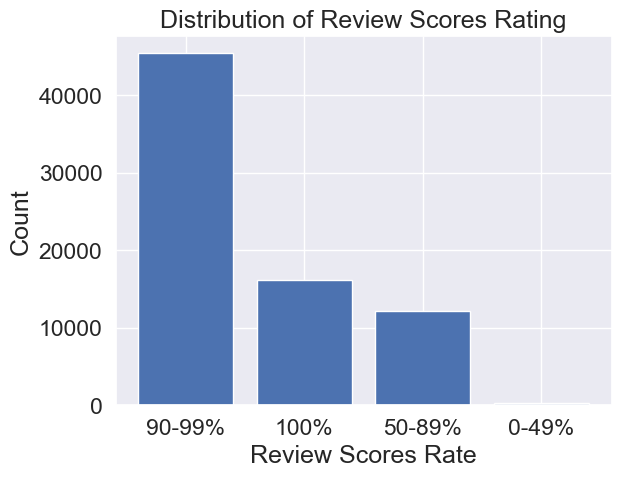

In [150]:
import matplotlib.pyplot as plt

plt.bar(cleaned_df.review_scores_rating.value_counts().index, cleaned_df.review_scores_rating.value_counts().values)
plt.xlabel('Review Scores Rate')
plt.ylabel('Count')
plt.title('Distribution of Review Scores Rating')
plt.show()


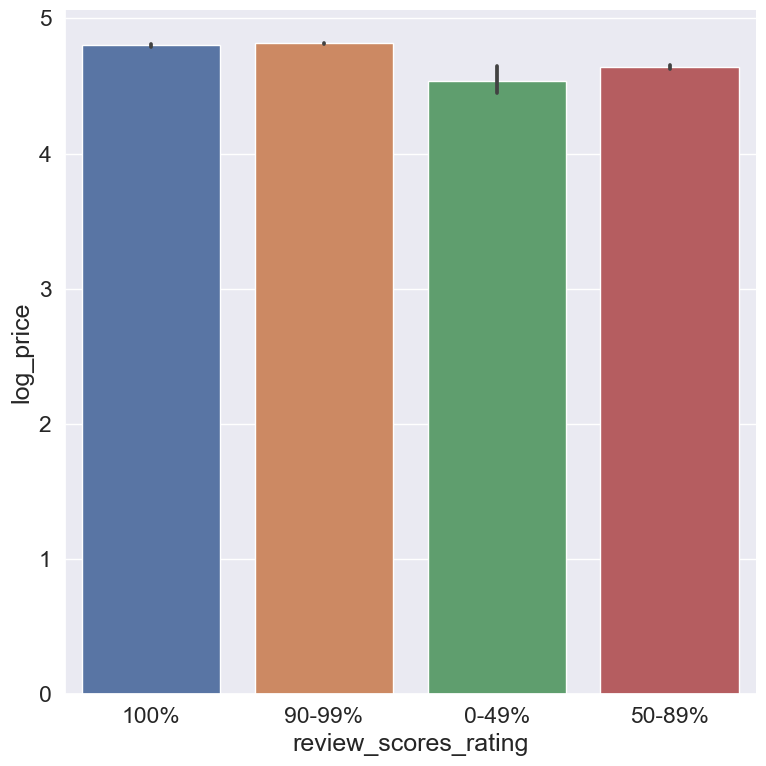

In [151]:
catplot('review_scores_rating')

## host_has_profile_pic

In [152]:
#We changed the true ones 1 the false ones 0 and filled the nan values with 0
cleaned_df.loc[cleaned_df.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
cleaned_df.loc[cleaned_df.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0

## host_identity_verified

In [153]:
#We changed the true ones 1 the false ones 0 and filled the nan values with 0
cleaned_df.loc[cleaned_df.host_identity_verified == 't', 'host_identity_verified'] = 1
cleaned_df.loc[cleaned_df.host_identity_verified == 'f', 'host_identity_verified'] = 0

## instant_bookable

In [154]:
#We changed the true ones 1 the false ones 0 
cleaned_df.loc[cleaned_df.instant_bookable == 't', 'instant_bookable'] = 1
cleaned_df.loc[cleaned_df.instant_bookable == 'f', 'instant_bookable'] = 0

## super_host

In [155]:
cleaned_df['host_since_day'].mean()

3279.6570702221743

In [156]:
cleaned_df['host_since_day'].min()

2109

In [157]:
cleaned_df['number_of_reviews'].describe()

count    73951.000000
mean     20.794729   
std      37.025749   
min      0.000000    
25%      1.000000    
50%      6.000000    
75%      23.000000   
max      388.000000  
Name: number_of_reviews, dtype: float64

In [158]:
cleaned_df['super_host'] = ((cleaned_df['host_since_day'] > cleaned_df['host_since_day'].mean()) &
                    (cleaned_df['host_identity_verified'] == 1) &
                    (cleaned_df['host_has_profile_pic'] == 1) &
                    ((cleaned_df['host_response_rate'] == '90-99%') | (cleaned_df['host_response_rate'] == '100%')) &
                    ((cleaned_df['review_scores_rating'] == '90-99%') | (cleaned_df['review_scores_rating'] == '100%'))
)

cleaned_df['super_host']

0        False
1        False
2        False
3        False
4        False
         ...  
74106    False
74107    False
74108    True 
74109    False
74110    True 
Name: super_host, Length: 73951, dtype: bool

In [210]:
#We changed the true ones 1 the false ones 0 
cleaned_df.loc[cleaned_df.super_host == True, 'super_host'] = 1
cleaned_df.loc[cleaned_df.super_host == False, 'super_host'] = 0

In [211]:
cleaned_df['super_host'].value_counts()

0    58637
1    15314
Name: super_host, dtype: int64

In [216]:
cleaned_df['super_host'] = cleaned_df['super_host'].astype(int)

In [161]:
correlation = cleaned_df['super_host'].corr(cleaned_df['log_price'])
correlation

AttributeError: 'float' object has no attribute 'shape'

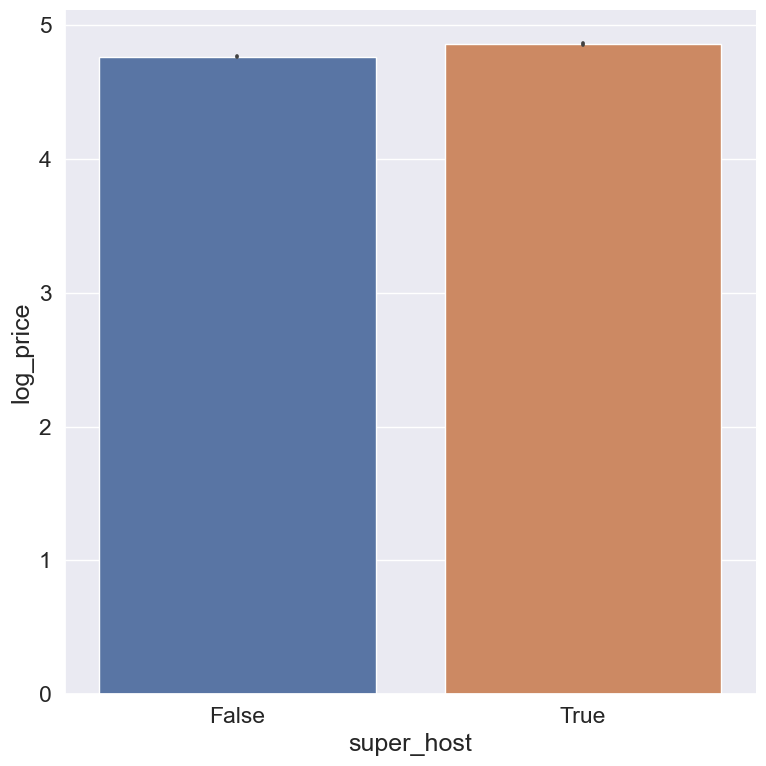

In [162]:
import seaborn as sns 
catplot('super_host')

### 30-median_home_value(Feature engineering)


In [163]:
# Creates a new column that gives us median house value of given zipcode

def get_median_home_value(zipcode):
    search = SearchEngine()
    zipcode_data = search.by_zipcode(zipcode)
    median_home_value = None
    if zipcode_data is not None:
        median_home_value = zipcode_data.median_home_value
    search.close()
    return median_home_value

# Iterate over the cleaned_df rows
for index, row in cleaned_df.iterrows():
    median_home_value = get_median_home_value(row['zipcode'])
    cleaned_df.loc[index, 'median_home_value'] = median_home_value

Exception ignored in: <function SearchEngine.__del__ at 0x000001D7EED9E290>
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\uszipcode\search.py", line 195, in __del__
    if self.ses:
AttributeError: 'SearchEngine' object has no attribute 'ses'


In [167]:
# Checking if there is missing values
cleaned_df['median_home_value'].isnull().sum()

0

In [165]:
# Lets handle missing values
cleaned_df['median_home_value'] = cleaned_df['median_home_value'].fillna(cleaned_df['median_home_value'].mean())

## distance_to_center

In [168]:
# Defining center coordinates of each city

for index, row in cleaned_df.iterrows():
    if cleaned_df.loc[index, 'city'] == 'NYC':
        cleaned_df.loc[index, 'lat_center'] = 40.72
        cleaned_df.loc[index, 'long_center'] = -74.0060
    elif cleaned_df.loc[index, 'city'] == 'LA':
        cleaned_df.loc[index, 'lat_center'] = 34.0522
        cleaned_df.loc[index, 'long_center'] = -118.2437
    elif cleaned_df.loc[index, 'city'] == 'SF':
        cleaned_df.loc[index, 'lat_center'] = 37.7749
        cleaned_df.loc[index, 'long_center'] = -122.4194
    elif cleaned_df.loc[index, 'city'] == 'DC':
        cleaned_df.loc[index, 'lat_center'] = 38.9072
        cleaned_df.loc[index, 'long_center'] = -77.0369
    elif cleaned_df.loc[index, 'city'] == 'Chicago':
        cleaned_df.loc[index, 'lat_center'] = 41.8781
        cleaned_df.loc[index, 'long_center'] = -87.6298
    elif cleaned_df.loc[index, 'city'] == 'Boston':
        cleaned_df.loc[index, 'lat_center'] = 42.3601
        cleaned_df.loc[index, 'long_center'] = -71.0589
        

In [169]:
# Creates the new column
cleaned_df['distance_to_center']=np.sqrt((cleaned_df['lat_center']-cleaned_df['latitude'])**2+(cleaned_df['long_center']-cleaned_df['longitude'])**2)

In [170]:
def corr_columns(cleaned_df,c1):
    print (np.corrcoef(cleaned_df[c1], cleaned_df['log_price']))
    sns.regplot(x=cleaned_df[c1],y=cleaned_df['log_price'],fit_reg=True,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.show()

[[ 1.         -0.13803765]
 [-0.13803765  1.        ]]


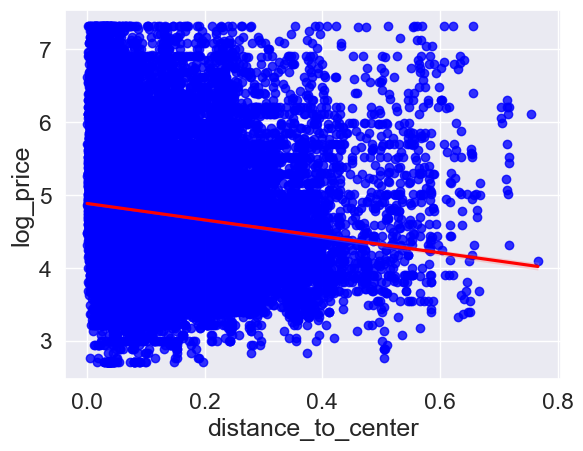

In [171]:
# lets see how our new column effect log_price
corr_columns(cleaned_df,'distance_to_center')

[[1.         0.30109745]
 [0.30109745 1.        ]]


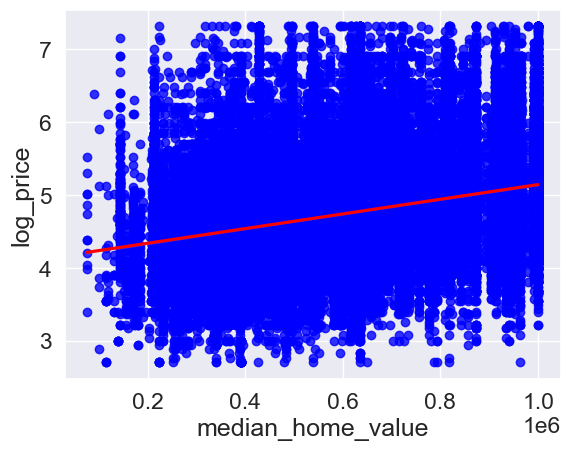

In [172]:
corr_columns(cleaned_df,'median_home_value')

# Normalization check

In [179]:
# numeric columns
numerical_col = ['log_price','number_of_reviews','distance_to_center','median_home_value']

In [278]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Perform normality tests for each numeric column
for column in numerical_col:
    data = cleaned_df[column].dropna()

    # Shapiro-Wilk test
    shapiro_stat, shapiro_pvalue = stats.shapiro(data)
    shapiro_normal = shapiro_pvalue > 0.05

    # Anderson-Darling test
    anderson_stat, anderson_crit, anderson_sign = stats.anderson(data)
    anderson_normal = anderson_stat < anderson_crit[anderson_sign == 15][0]

    # D'Agostino's K^2 test
    dagostino_stat, dagostino_pvalue = stats.normaltest(data)
    dagostino_normal = dagostino_pvalue > 0.05

    # Jarque-Bera test
    jarquebera_stat, jarquebera_pvalue = stats.jarque_bera(data)
    jarquebera_normal = jarquebera_pvalue > 0.05

    print(f"Column: {column}")
    print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")
    print(f"Anderson-Darling test - Normal: {anderson_normal}")
    print(f"D'Agostino's K^2 test - Normal: {dagostino_normal}")
    print(f"Jarque-Bera test - Normal: {jarquebera_normal}")
    print()

Column: log_price
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: number_of_reviews
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: distance_to_center
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: median_home_value
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False



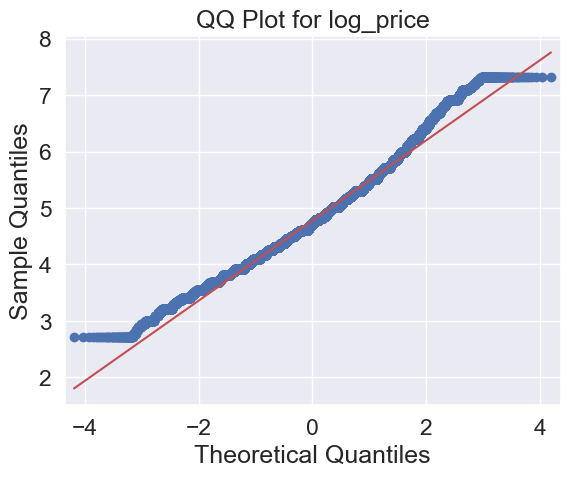

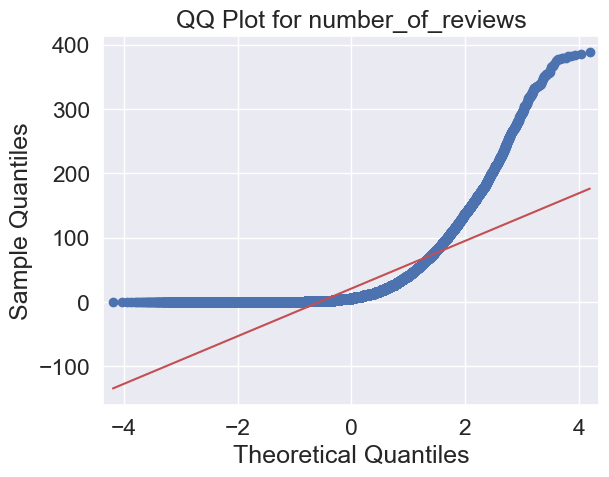

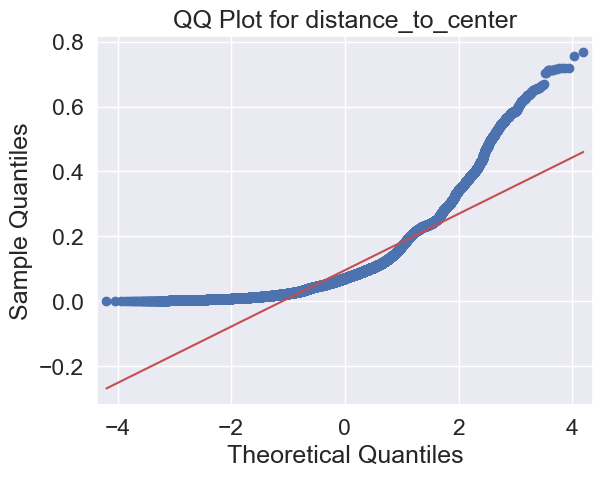

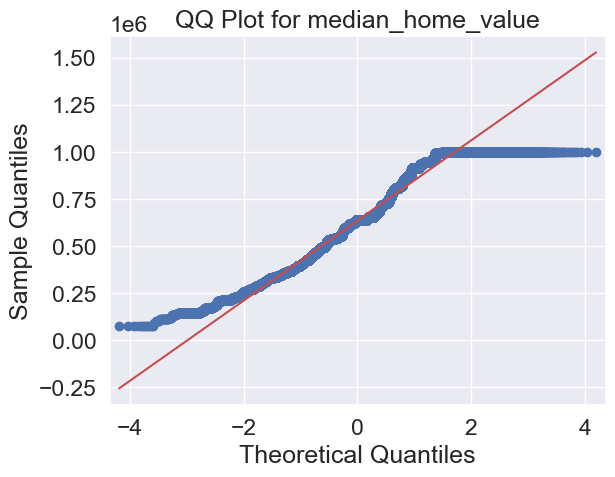

In [176]:
import statsmodels.api as sm
# Perform normality check using QQ plot
for column in numerical_col:
    # Create QQ plot
    sm.qqplot(cleaned_df[column], line='s')
    plt.title(f"QQ Plot for {column}")
    plt.show()



In [180]:
def transformation_numerical(col): 
    # Select only the numeric columns
    numeric_data = cleaned_df[numerical_col]
    # Perform  transformations on each numeric column
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    reciprocal_transformed_df = 1 / (numeric_data + 1)

    # Plot the original and transformed datas for a single column
    column = col
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.hist(numeric_data[column], bins=20)
    plt.title(f'{column} in Original Data')
    plt.subplot(2, 2, 2)
    plt.hist(log_transformed_df[column], bins=20)
    plt.title(f'{column} in Logarithmic Transformation')
    plt.subplot(2, 2, 3)
    plt.hist(sqrt_transformed_df[column], bins=20)
    plt.title(f'{column} in Square Root Transformation')
    plt.subplot(2, 2, 4)
    plt.hist(power_transformed_df[column], bins=20)
    plt.title(f'{column} in Power Transformation')
    plt.tight_layout()
    plt.show()

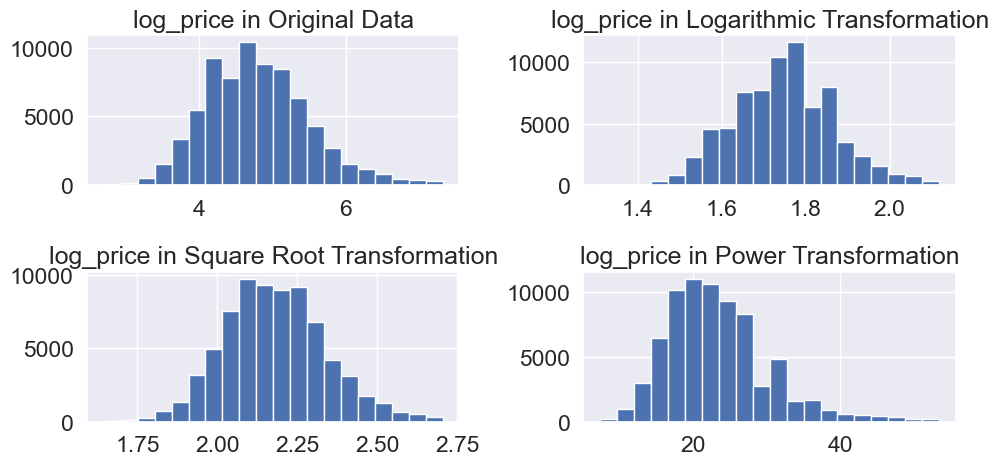

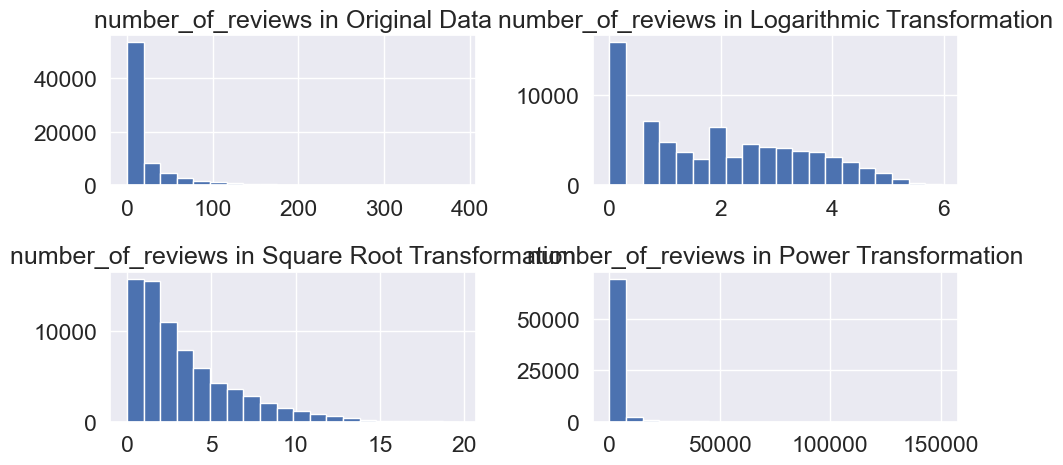

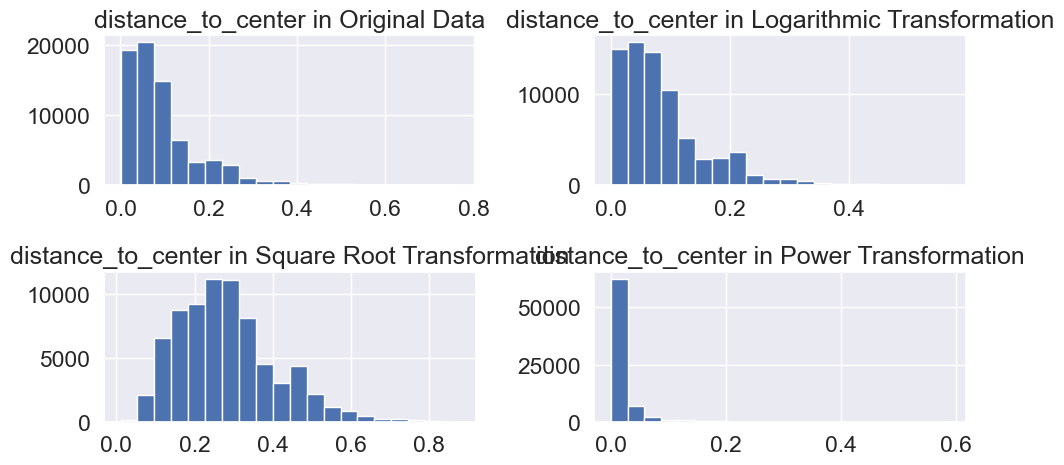

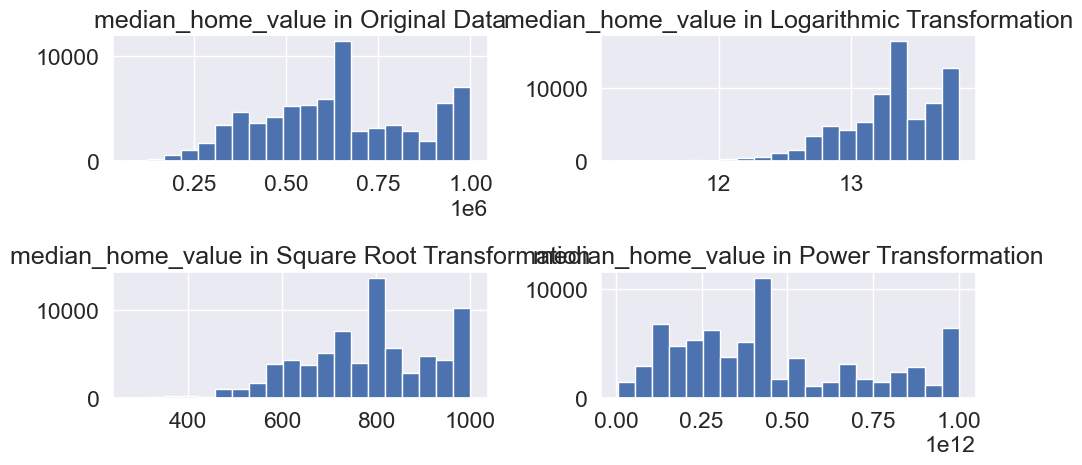

In [183]:
# applying the method to our data
for i in numerical_col :
    transformation_numerical(i)

# Transformation

In [190]:
import statsmodels.api as sm
def normality_b_a_transformed(col):
    column = col

    numeric_data = cleaned_df[numerical_col]

    log_transformed_cleaned_df = np.log1p(numeric_data)
    sqrt_transformed_cleaned_df = np.sqrt(numeric_data)
    power_transformed_cleaned_df = np.power(numeric_data, 2)

    sm.qqplot(numeric_data[column],line='s')
    plt.title(f"QQ Plot for {column} in Original Data")
    plt.show()
    sm.qqplot(log_transformed_cleaned_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Logarithmic Transformed Data")
    plt.show()
    sm.qqplot(sqrt_transformed_cleaned_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Square Root Transformed Data")
    plt.show()
    sm.qqplot(power_transformed_cleaned_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Power Transformed Data")
    plt.show()

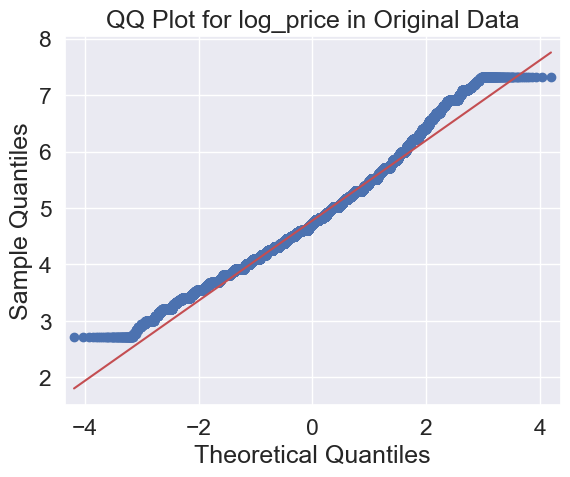

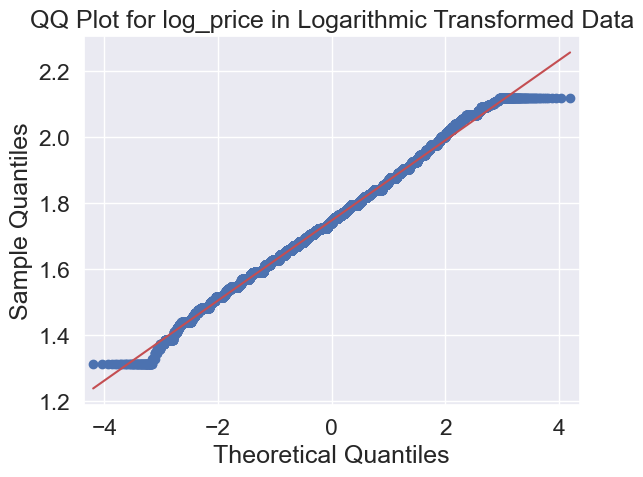

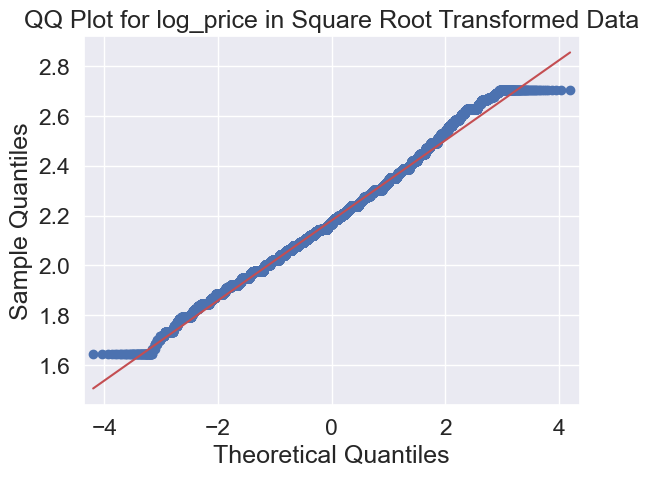

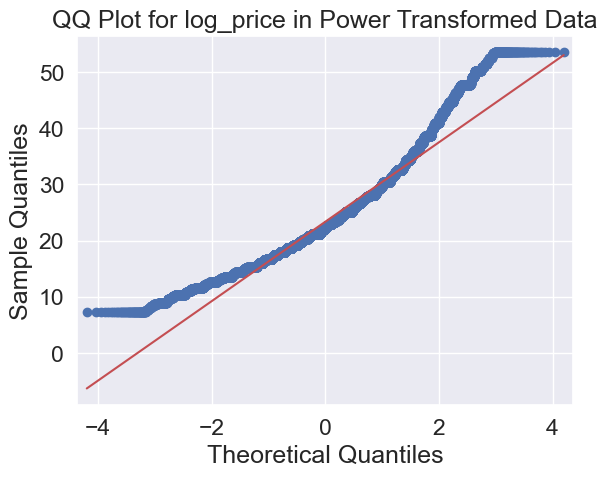

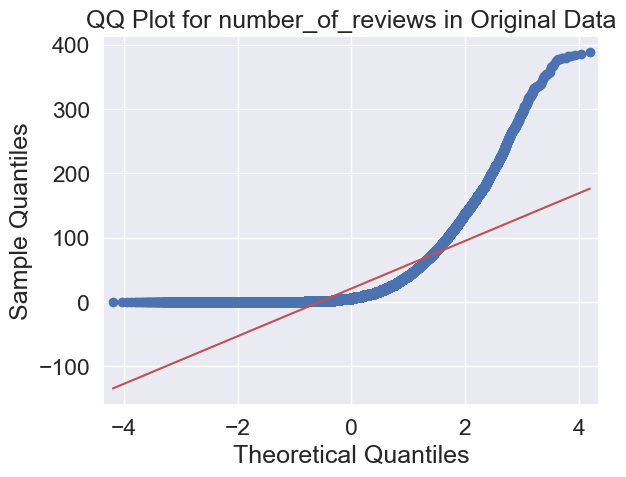

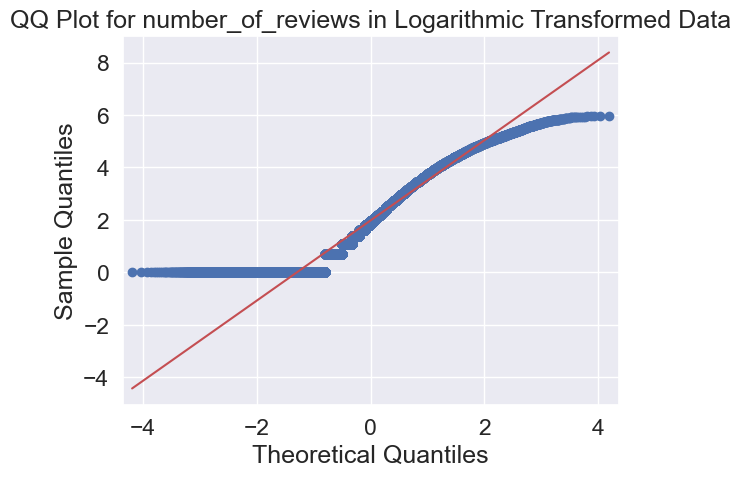

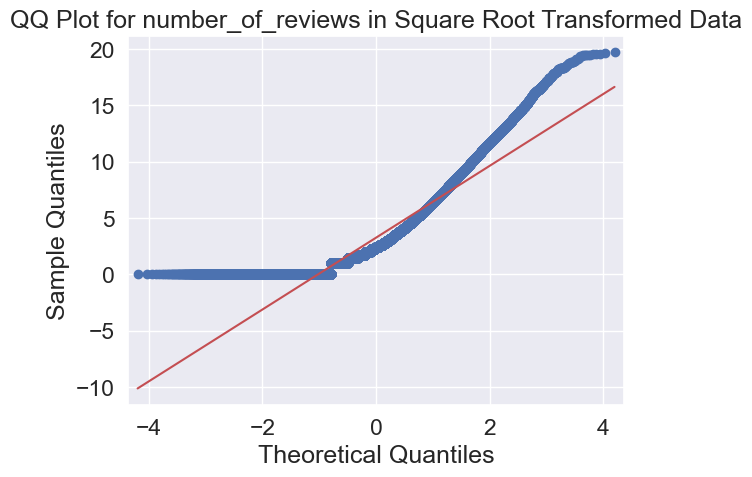

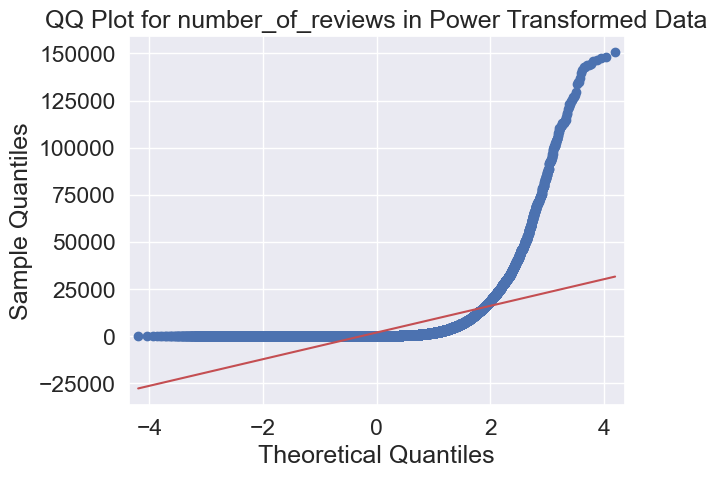

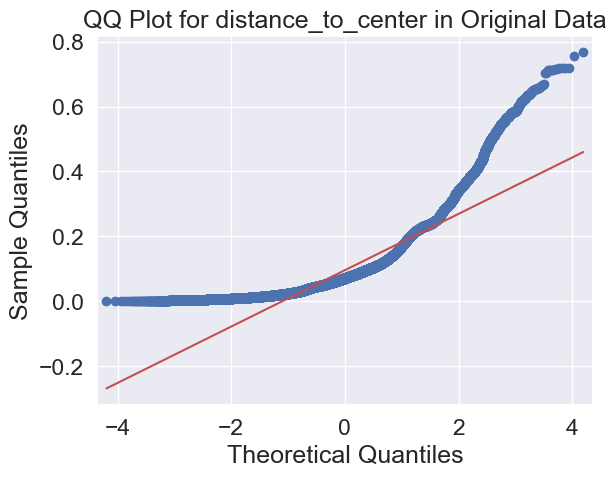

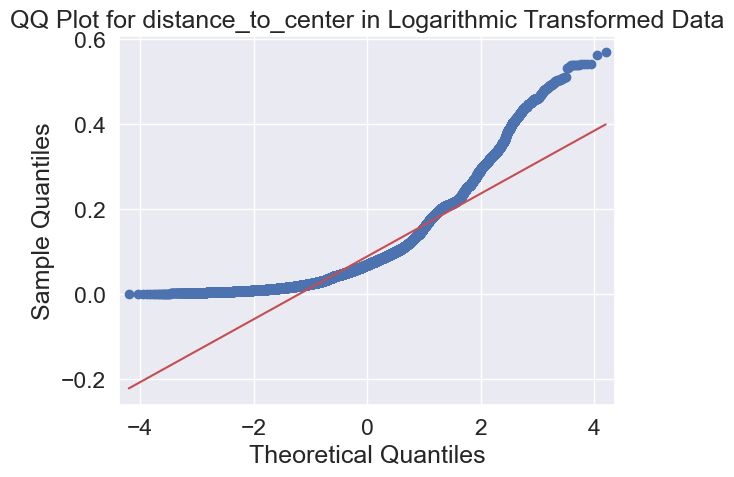

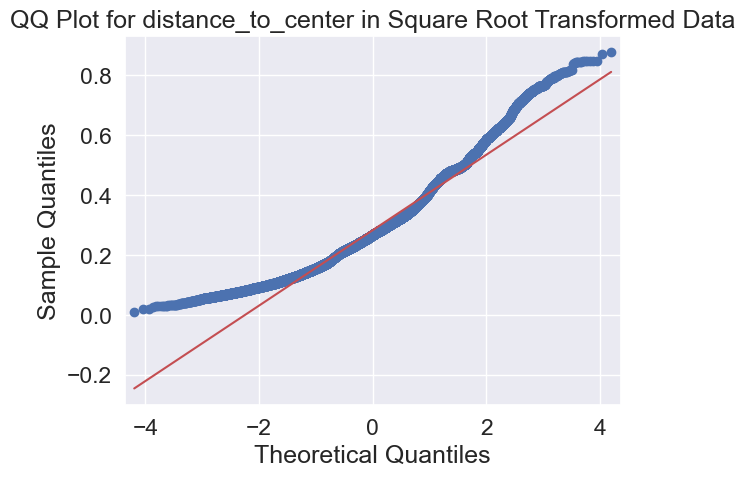

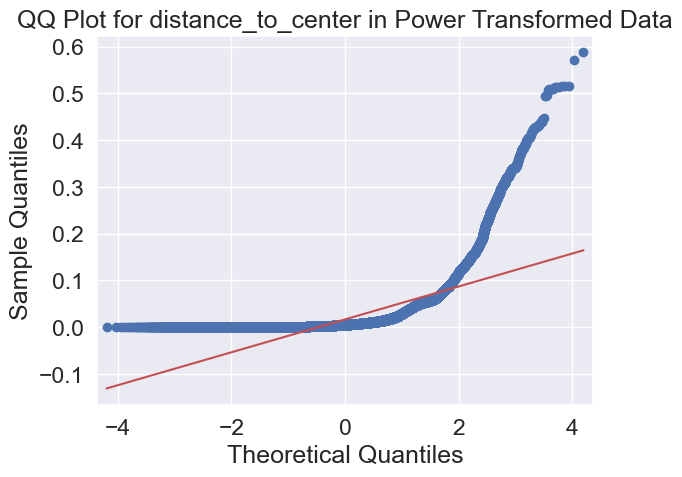

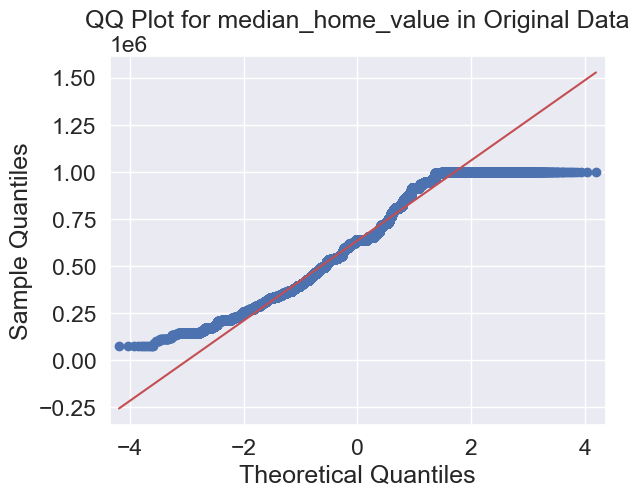

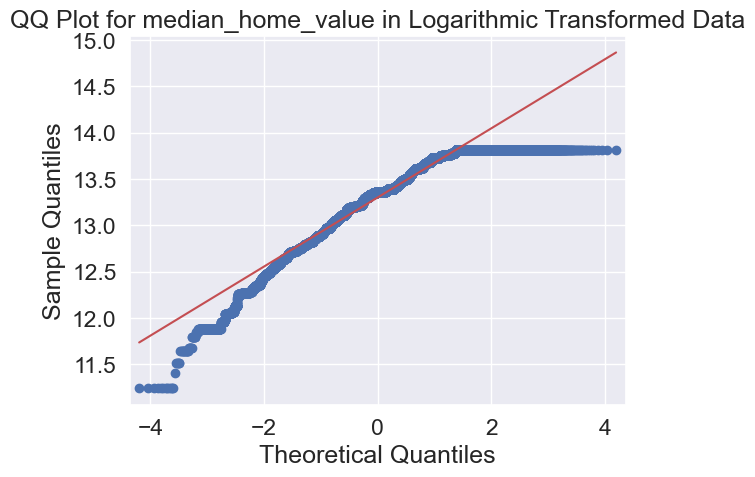

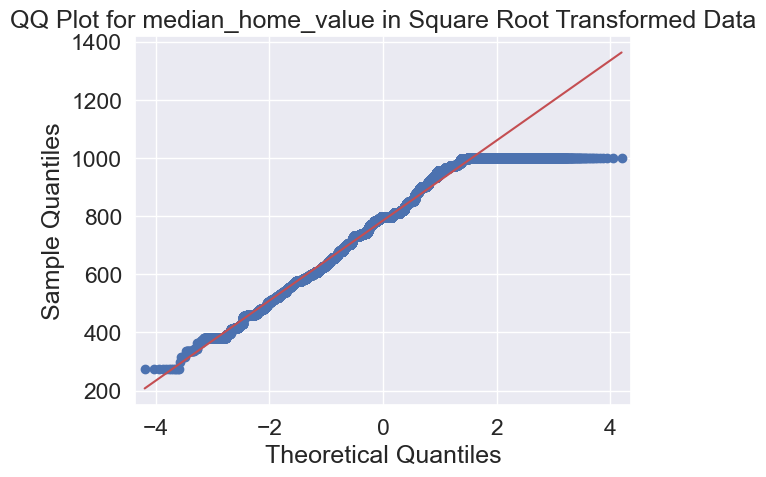

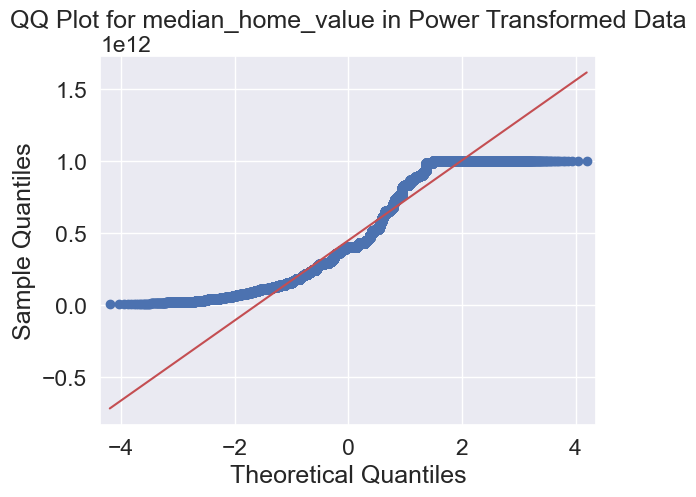

In [188]:
for i in numerical_col:
    normality_b_a_transformed(i)

In [197]:
cleaned_df['median_home_value'] = np.sqrt(cleaned_df['median_home_value'])
cleaned_df['distance_to_center'] = np.sqrt(cleaned_df['distance_to_center'])
cleaned_df['number_of_reviews'] = np.log1p(cleaned_df['number_of_reviews'])

In [217]:
final_df = cleaned_df.copy()

In [218]:
final_df = final_df.drop(columns=['last_review', 'first_review'], axis=1)

In [225]:
target_correlation = final_df.corr()['log_price'].abs().sort_values(ascending=False)
target_correlation

log_price                 1.000000
accommodates              0.565354
bedrooms                  0.467674
beds                      0.438795
bathrooms                 0.344223
median_home_value         0.295867
distance_to_center        0.196509
thumbnail_url             0.123959
cleaning_fee              0.113428
host_since_day            0.079447
number_of_reviews         0.054788
super_host                0.054393
longitude                 0.046219
long_center               0.045574
time_since_last_review    0.019541
latitude                  0.000687
lat_center                0.000680
Name: log_price, dtype: float64

In [279]:
model_cols = ['accommodates','bathrooms','median_home_value','distance_to_center','cleaning_fee','super_host','number_of_reviews','log_price']
final_df[model_cols]

,accommodates,bathrooms,median_home_value,distance_to_center,cleaning_fee,super_host,number_of_reviews,log_price
0,3,1.0,817.924202,0.165928,True,0,1.098612,5.010635
1,7,1.0,899.221886,0.221665,True,0,1.945910,5.129899
2,5,1.0,846.226920,0.328448,True,0,2.397895,4.976734
3,4,1.0,954.725091,0.112058,True,0,0.000000,6.620073
4,2,1.0,734.438561,0.136273,True,0,1.609438,4.744932
...,...,...,...,...,...,...,...,...
74106,1,1.0,730.342385,0.259795,False,0,0.000000,4.605170
74107,4,2.0,1000.000500,0.486126,True,0,2.833213,5.043425
74108,5,1.0,730.342385,0.254927,True,1,3.784190,5.220356
74109,2,1.0,956.294934,0.139405,True,0,0.000000,5.273000


In [263]:
from sklearn.preprocessing import MinMaxScaler

# bazen target`a uygulanmaz


# Perform min-max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(final_df[model_cols])

# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(data_scaled, columns=model_cols)
data_scaled.head()

,accommodates,bathrooms,median_home_value,distance_to_center,cleaning_fee,super_host,number_of_reviews,log_price
0,0.133333,0.125,0.748624,0.179495,1.0,0.0,0.184220,0.500000
1,0.400000,0.125,0.860864,0.243939,1.0,0.0,0.326299,0.525898
2,0.266667,0.125,0.787699,0.367405,1.0,0.0,0.402090,0.492638
3,0.200000,0.125,0.937492,0.117210,1.0,0.0,0.000000,0.849485
4,0.066667,0.125,0.633364,0.145208,1.0,0.0,0.269878,0.442303


In [286]:

X = data_scaled.drop(['log_price'], axis =1)
y = final_df.log_price

In [307]:
y

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
74106    4.605170
74107    5.043425
74108    5.220356
74109    5.273000
74110    4.852030
Name: log_price, Length: 73951, dtype: float64

In [287]:
y.describe()

count    73951.000000
mean     4.779918    
std      0.708964    
min      2.708050    
25%      4.317488    
50%      4.709530    
75%      5.220356    
max      7.313220    
Name: log_price, dtype: float64

In [282]:
X

,accommodates,bathrooms,median_home_value,distance_to_center,cleaning_fee,super_host,number_of_reviews
0,0.133333,0.125,0.748624,0.179495,1.0,0.0,0.184220
1,0.400000,0.125,0.860864,0.243939,1.0,0.0,0.326299
2,0.266667,0.125,0.787699,0.367405,1.0,0.0,0.402090
3,0.200000,0.125,0.937492,0.117210,1.0,0.0,0.000000
4,0.066667,0.125,0.633364,0.145208,1.0,0.0,0.269878
...,...,...,...,...,...,...,...
73946,0.000000,0.125,0.627708,0.288027,0.0,0.0,0.000000
73947,0.200000,0.250,1.000000,0.549716,1.0,0.0,0.475086
73948,0.266667,0.125,0.627708,0.282399,1.0,1.0,0.634550
73949,0.066667,0.125,0.939660,0.148829,1.0,0.0,0.000000


In [288]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [289]:
from xgboost import XGBRegressor
from sklearn import metrics

xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.32996986748060847

Mean Squarred Error of XGBoost Regressor     :  0.19258299994172653

Root Mean Squarred Error of XGBoost Regressor:  0.43884279638809903

R2 Score of XGBoost Regressor                :  0.6178244093965027


In [304]:

k_t = pd.DataFrame({"gercek_y": np.exp(y[0:20]),
                    "tahmin_y": np.exp(xgb.predict(X)[0:20])})

k_t

,gercek_y,tahmin_y
0,150.0,156.428848
1,169.0,333.690857
2,145.0,136.882278
3,750.0,263.126068
4,115.0,98.248505
5,85.0,142.919586
6,83.0,136.165070
7,120.0,141.707550
8,120.0,93.235542
9,36.0,41.949596


# Tuning


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
-0.19884401094124401